# Projet IA

|Auteur|Centre|Modification|
|---|---|---|
|Valentin Obert, Timoth√©e Renaud, Jules Thiebault, Samuel Jully|Reims|06/02/2025|

# Pr√©diction des d√©parts de l'entreprise HumanForYou

## 1. Introduction
Dans ce fichier Jupyter, nous allons d√©velopper un mod√®le dans le but d'identifier les facteurs influen√ßant le turn-over de 15% des employ√©s de l'entreprise pharmaceutique indienne HumanForYou.

## 2. Chargement et Pr√©paration des Donn√©es

### 2.1 Importation des donn√©es

## Importation des biblioth√®ques

Nous importons ici les biblioth√®ques essentielles pour la manipulation des donn√©es et le machine learning :  

- **pandas** : Gestion et manipulation des tableaux de donn√©es.  
- **numpy** : Op√©rations math√©matiques et manipulation efficace des matrices.  
- **matplotlib et seaborn** : Visualisation des donn√©es sous forme de graphiques.  
- **sklearn** : Contient tous les outils n√©cessaires au pr√©traitement, √† la mod√©lisation et √† l‚Äô√©valuation des mod√®les.


## 2. Chargement et Pr√©paration des Donn√©es

### 2.1 Importation des donn√©es

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### 2.2 Pr√©paration des heures d'arriv√©es et de sorties



In [20]:
import os
from datetime import datetime

def parse_time(datetime_str):
    """Extrait uniquement l'heure (HH:MM:SS) d'une cha√Æne de date-heure et convertit en secondes."""
    try:
        time_obj = pd.to_datetime(datetime_str, format='%Y-%m-%d %H:%M:%S', errors='coerce').time()
        return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second  # Convertir en secondes
    except:
        return np.nan

def seconds_to_time(seconds):
    """Convertit des secondes en format HH:MM:SS."""
    if np.isnan(seconds):
        return np.nan
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    sec = int(seconds % 60)
    return f"{hours:02}:{minutes:02}:{sec:02}"

def fill_missing_times(file_path, output_path):
    df = pd.read_csv(file_path)
    
    # Supposons que la premi√®re colonne soit un index/ID
    id_column = df.columns[0]
    df.set_index(id_column, inplace=True)
    
    # Renommer la colonne "2015-01-01" en "medianes_in_time"
    if "2015-01-01" in df.columns:
        df.rename(columns={"2015-01-01": "medianes_in_time"}, inplace=True)
    
    # Suppression des dates, conservation uniquement des horaires sous forme de secondes
    for col in df.columns:
        df[col] = df[col].astype(str).apply(parse_time)
    
    print("D√©but du traitement des valeurs manquantes...")
    
    # Remplacement des valeurs manquantes par la m√©diane de la ligne
    for i in range(len(df)):
        valid_values = df.iloc[i].dropna()
        if not valid_values.empty:
            median_value = np.median(valid_values)
            for col in df.columns:
                if not df[col].isna().all():  # Ne pas modifier les colonnes enti√®rement vides
                    if pd.isna(df.at[df.index[i], col]):
                        df.at[df.index[i], col] = median_value
            
            # Stocker la m√©diane dans la colonne "medianes_in_time"
            df.at[df.index[i], "medianes_in_time"] = median_value
        
        if i % 500 == 0:
            print(f"Progression: {i}/{len(df)} lignes trait√©es...")
    
    print("Remplacement termin√©, conversion des valeurs...")
    
    # Conversion inverse en format original HH:MM:SS
    for col in df.columns:
        if not df[col].isna().all():  # Ne pas modifier les colonnes enti√®rement vides
            df[col] = df[col].apply(seconds_to_time)
    
    # Sauvegarde du fichier modifi√© avec gestion des permissions
    df.reset_index(inplace=True)
    try:
        if os.path.exists(output_path):
            os.remove(output_path)  # Supprime l'ancien fichier pour √©viter le blocage
        df.to_csv(output_path, index=False)
        print(f"Fichier trait√© et enregistr√© sous : {output_path}")
    except PermissionError:
        print("Erreur : Permission refus√©e. Assurez-vous que le fichier de sortie n'est pas ouvert et que vous avez les droits d'√©criture.")

# Exemple d'utilisation
input_file = "in_time.csv"
output_file = "in_time_filled_new.csv"  # Nouveau nom de fichier
fill_missing_times(input_file, output_file)
input_file = "out_time.csv"
output_file = "out_time_filled_new.csv"  # Nouveau nom de fichier
fill_missing_times(input_file, output_file)

D√©but du traitement des valeurs manquantes...
Progression: 0/4410 lignes trait√©es...
Progression: 500/4410 lignes trait√©es...
Progression: 1000/4410 lignes trait√©es...
Progression: 1500/4410 lignes trait√©es...
Progression: 2000/4410 lignes trait√©es...
Progression: 2500/4410 lignes trait√©es...
Progression: 3000/4410 lignes trait√©es...
Progression: 3500/4410 lignes trait√©es...
Progression: 4000/4410 lignes trait√©es...
Remplacement termin√©, conversion des valeurs...


C:\Users\noxra\AppData\Local\Temp\ipykernel_20948\3475386467.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


Fichier trait√© et enregistr√© sous : in_time_filled_new.csv
D√©but du traitement des valeurs manquantes...
Progression: 0/4410 lignes trait√©es...
Progression: 500/4410 lignes trait√©es...
Progression: 1000/4410 lignes trait√©es...
Progression: 1500/4410 lignes trait√©es...
Progression: 2000/4410 lignes trait√©es...
Progression: 2500/4410 lignes trait√©es...
Progression: 3000/4410 lignes trait√©es...
Progression: 3500/4410 lignes trait√©es...
Progression: 4000/4410 lignes trait√©es...
Remplacement termin√©, conversion des valeurs...


C:\Users\noxra\AppData\Local\Temp\ipykernel_20948\3475386467.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


Fichier trait√© et enregistr√© sous : out_time_filled_new.csv


### Cat√©gorisation des horaires

Nous avons d√©fini deux fonctions :
1. **categoriser_heure_in** : Classe les heures d'arriv√©e en 'T√¥t', 'Normal' ou 'Tard'.
2. **categoriser_heure_out** : Classe les heures de d√©part de la m√™me fa√ßon.

Cela permet d'ajouter une variable pour notre classification.

## Classification des heures d'arriv√©e

Cette fonction "categoriser_heure_in" attribue une cat√©gorie √† chaque heure d'arriv√©e :  
- `T√¥t` : Arriv√©e avant 9h.  
- `Normal` : Arriv√©e entre 9h et 10h.  
- `Tard` : Arriv√©e apr√®s 10h.  

Cela permet de transformer une variable continue (les horaires) en variable qualitative utile pour la classification.

In [21]:
# Cat√©goriser l'heure en p√©riodes
def categoriser_heure_out(h):
    
    if h < 17:
        return 'Tot'
    elif 17 <= h < 18:
        return 'normal'
    elif 18 <= h :
        return 'tard'
    else:
        return 'incorect'
    
def categoriser_heure_in(h):

    if  h < 9:
        return 'Tot'
    elif 9 <= h < 10:
        return 'normal'
    elif 10 <= h :
        return 'tard'
    else:
        return 'incorect'

# Charger le dataset
general_data = pd.read_csv('general_data.csv')
employee_survey_data = pd.read_csv('employee_survey_data.csv')
manager_survey_data = pd.read_csv('manager_survey_data.csv')
median_in_time_data = pd.read_csv('in_time_filled_new.csv')
median_in_time_data = median_in_time_data[['EmployeeID','medianes_in_time']]
median_out_time_data = pd.read_csv('out_time_filled_new.csv')
median_out_time_data = median_out_time_data[['EmployeeID','medianes_in_time']]
median_out_time_data = median_out_time_data.rename(columns={'medianes_in_time':'medianes_out_time'})

general_data = general_data.merge(manager_survey_data,how='inner',on=['EmployeeID'])
general_data = general_data.merge(employee_survey_data,how='inner',on=['EmployeeID'])
general_data = general_data.merge(median_in_time_data,how='inner',on=['EmployeeID'])
general_data = general_data.merge(median_out_time_data,how='inner',on=['EmployeeID'])
general_data['medianes_in_time'] = pd.to_datetime(general_data['medianes_in_time'], format='%H:%M:%S').dt.hour
general_data['medianes_in_time'] = general_data['medianes_in_time'].apply(categoriser_heure_in)
general_data['medianes_out_time'] = pd.to_datetime(general_data['medianes_out_time'], format='%H:%M:%S').dt.hour
general_data['medianes_out_time'] = general_data['medianes_out_time'].apply(categoriser_heure_out)
# Afficher les premi√®res lignes du dataset




In [22]:
pd.read_csv('employee_survey_data.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


## 3. Pr√©paration des Donn√©es
### 1. Supression des colonnes
Suite √† l'analyse √©thique nous avons identifi√© des colonnes qui ne doivent pas √™tre dans l'analyse

In [23]:
general_data = general_data.drop(columns=['Gender','MaritalStatus','Age'])

### 2. Visualisation de la distribution
Nous allons maintenant voir la distribution des variables pour identifier si il y a des variables inutiles

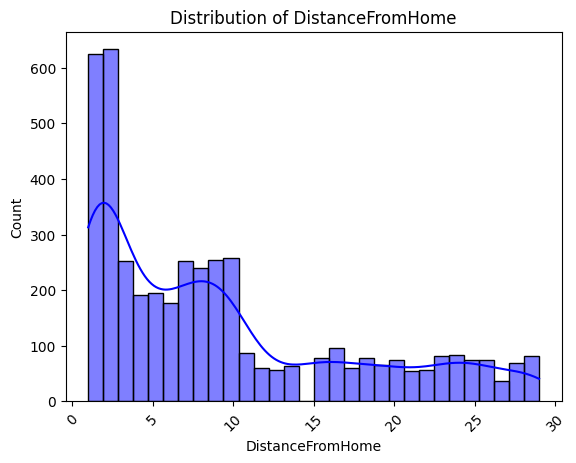

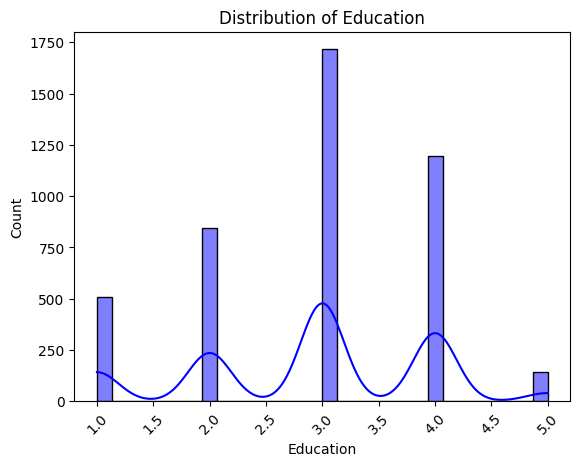

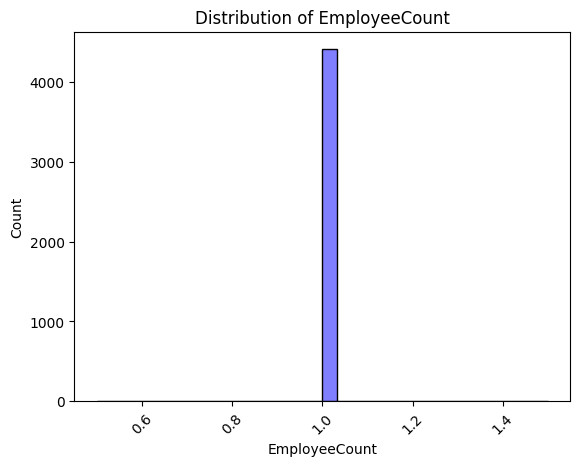

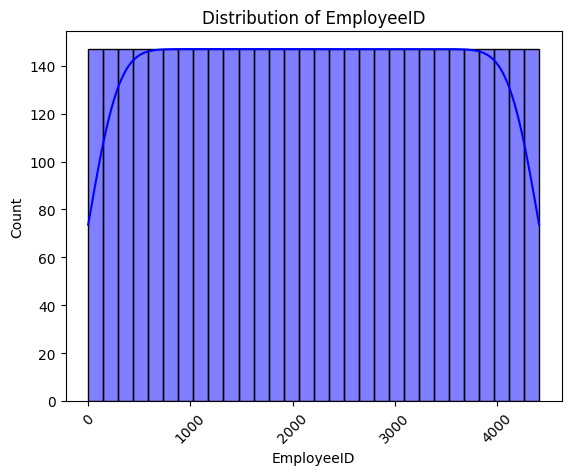

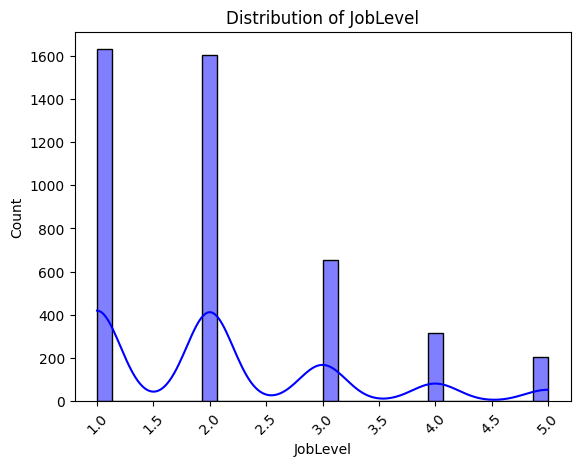

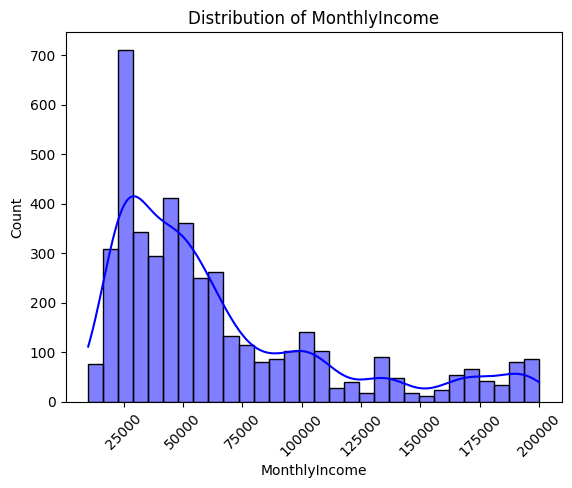

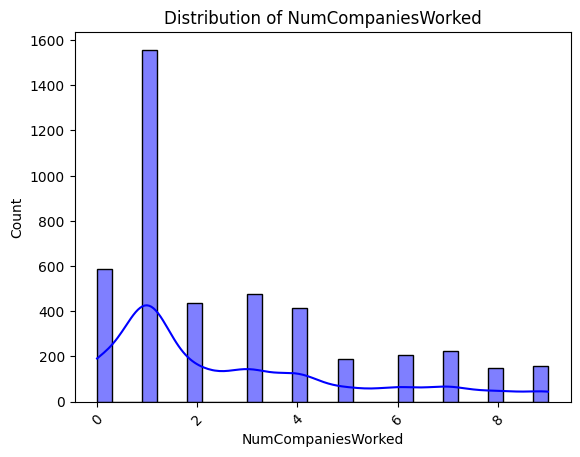

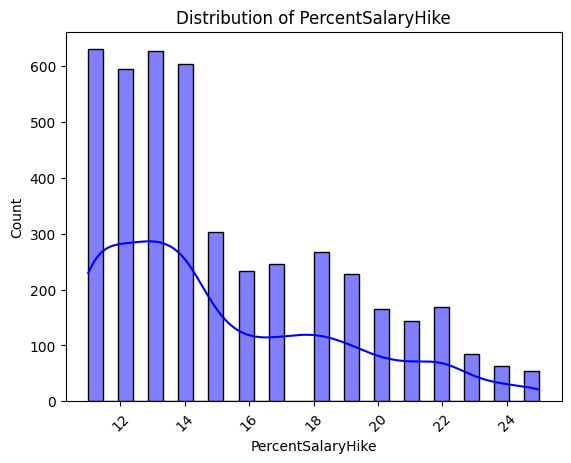

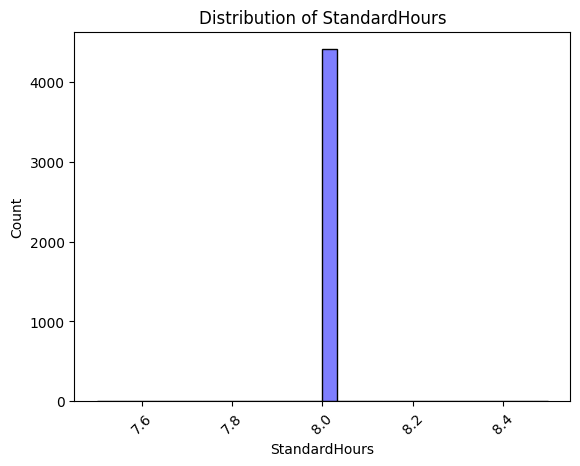

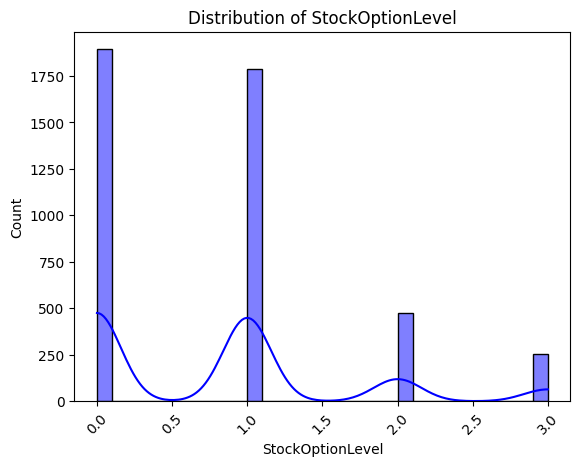

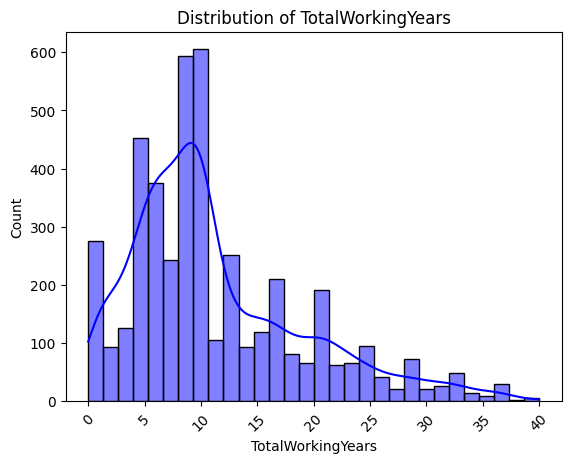

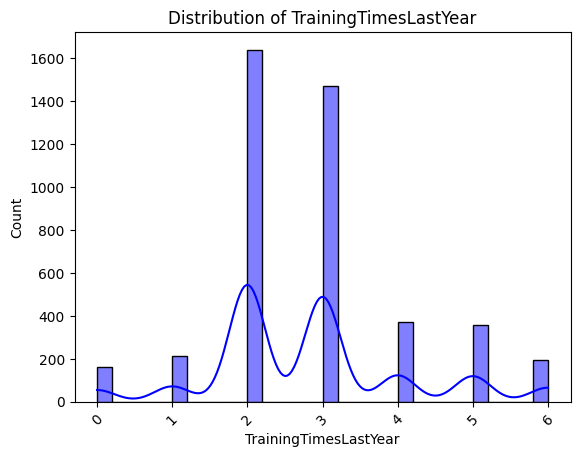

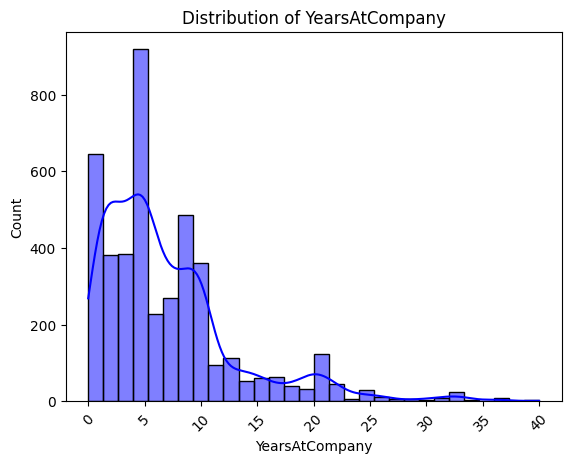

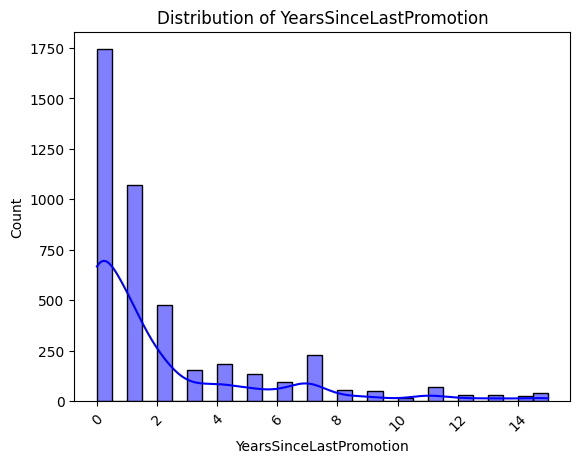

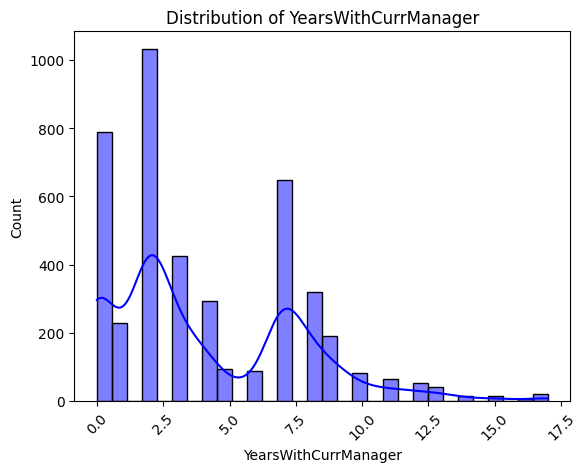

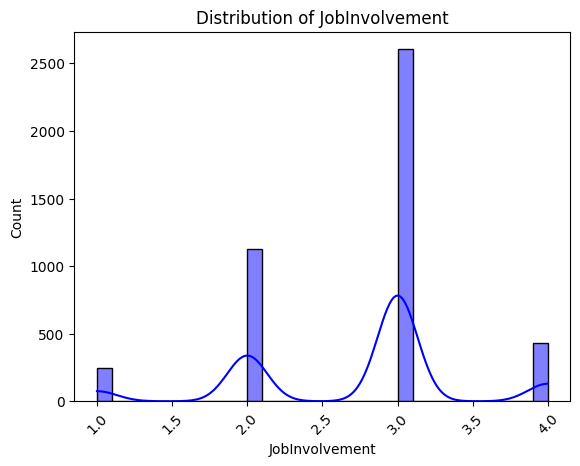

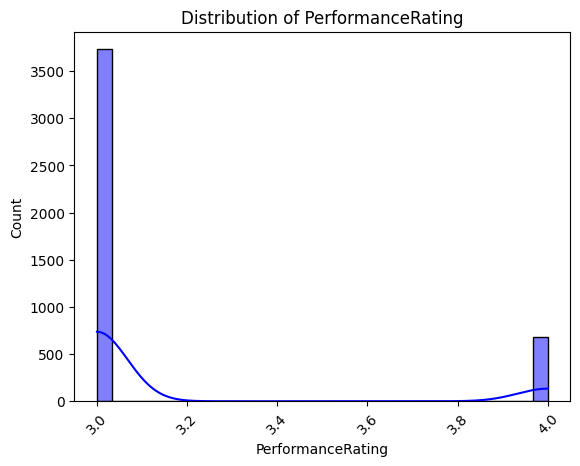

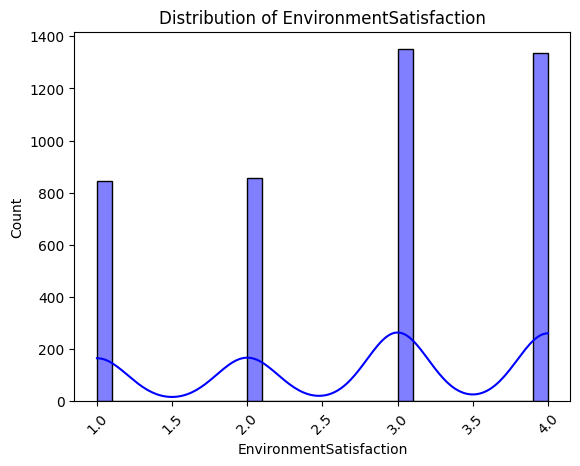

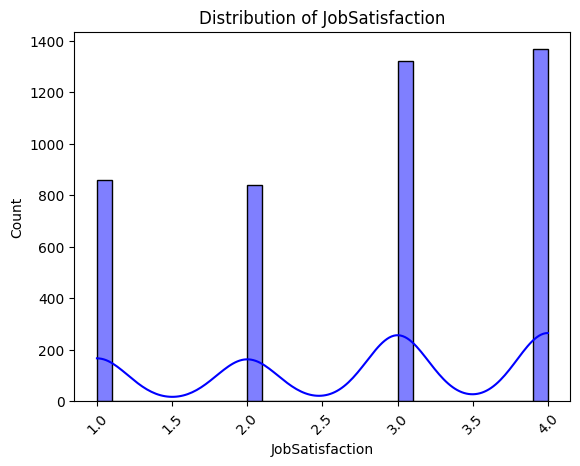

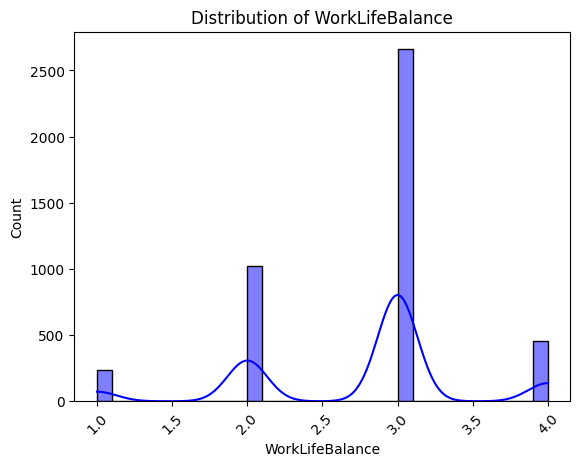

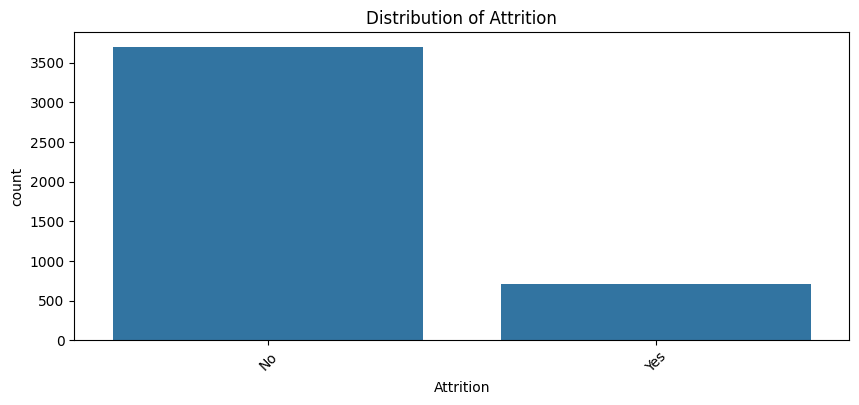

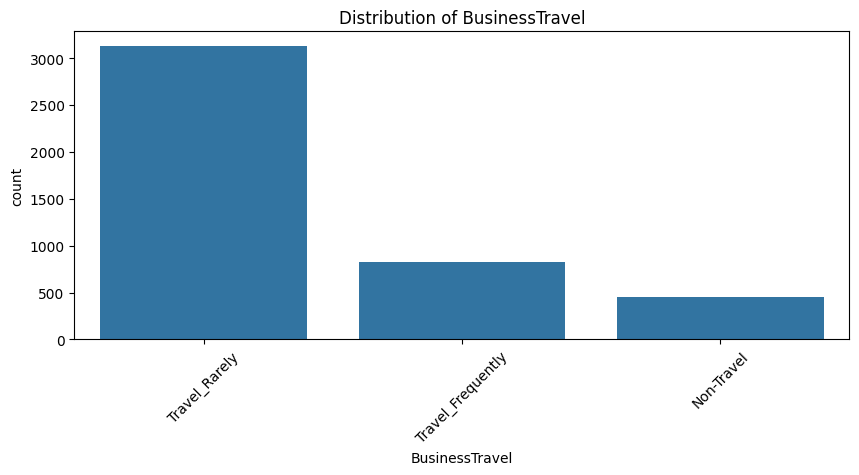

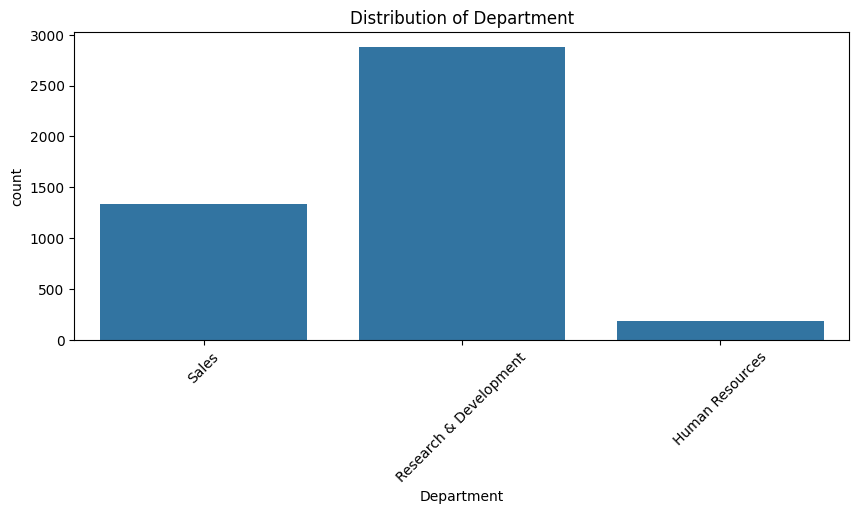

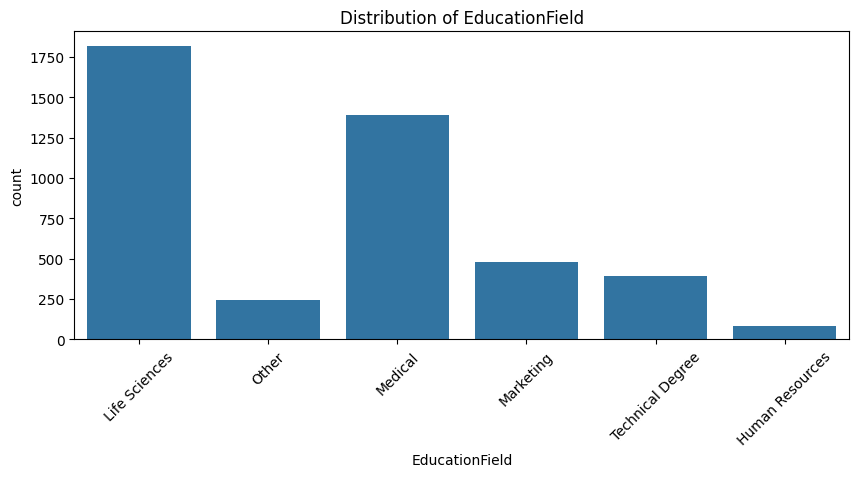

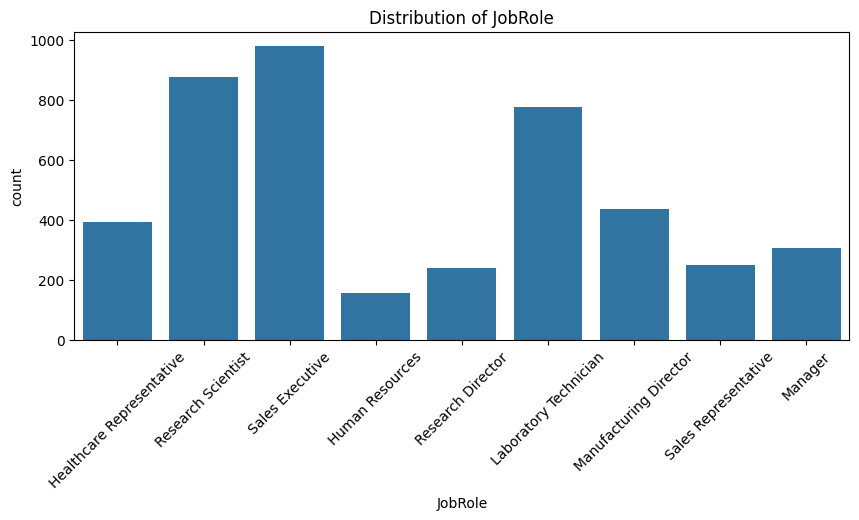

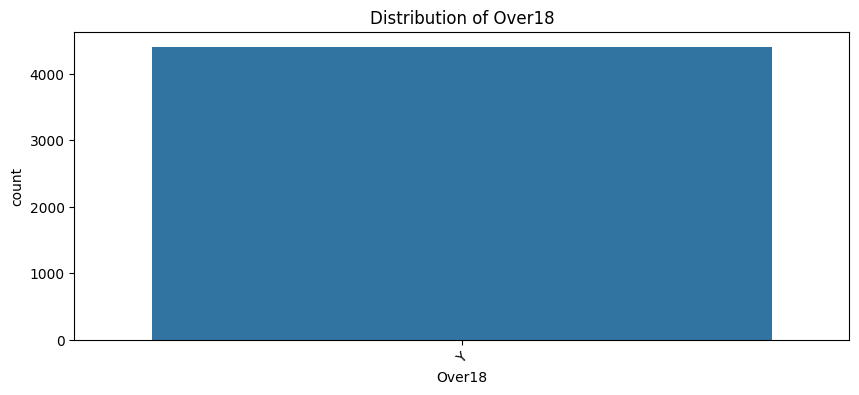

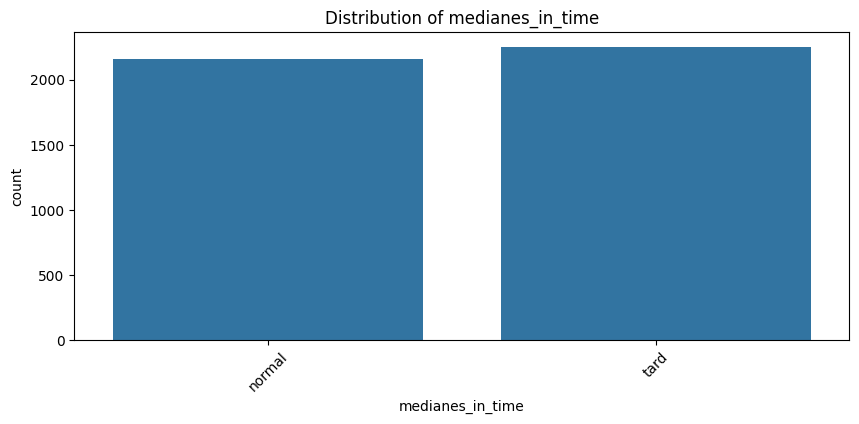

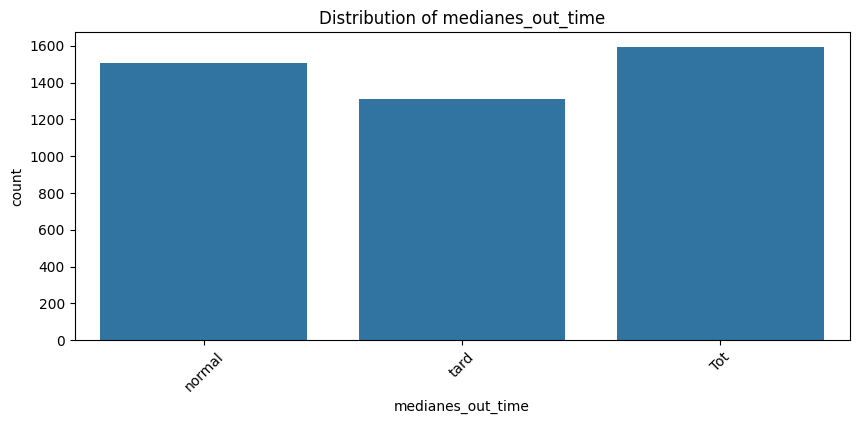

In [24]:
general_data_num = general_data.select_dtypes(include=['float64', 'int64'])
general_data_cat = general_data.select_dtypes(include=[object])
# Univariate analysis for numerical features
for column in general_data_num:
    sns.histplot(general_data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Univariate analysis for categorical features
for column in general_data_cat:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=general_data[column])
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

Nous pouvons d√©duire que les variables : EmployeeID, EmployeeCount, StandardHours et Over18 sont inutiles

In [25]:
general_data = general_data.drop(columns=['EmployeeID','EmployeeCount','StandardHours','Over18'])
general_data_num = general_data.select_dtypes(include=['float64', 'int64'])
general_data_cat = general_data.select_dtypes(include=[object])

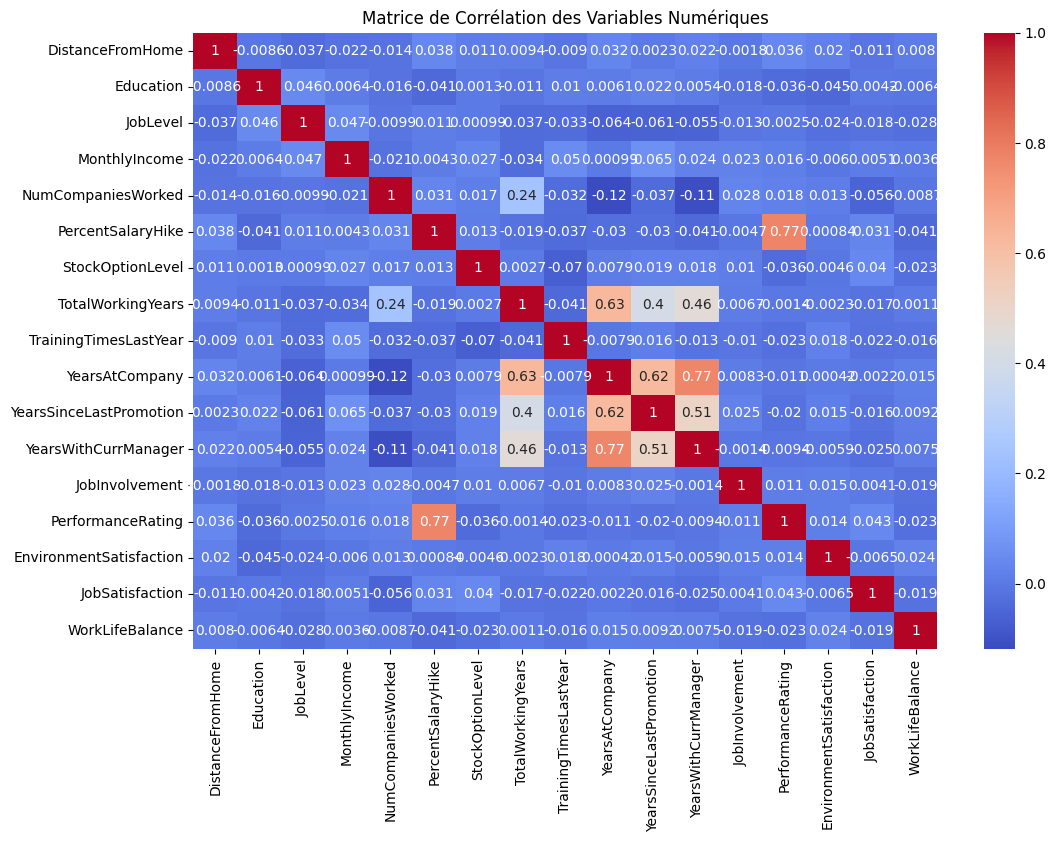

In [26]:
corr_matrix = general_data_num.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(general_data[general_data_num.columns].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de Corr√©lation des Variables Num√©riques')
plt.show()

In [27]:
general_data = general_data.drop(columns=['PerformanceRating','YearsAtCompany'])


### 2. Gestion des valeurs manquantes

## V√©rification et remplacement des valeurs manquantes

Nous v√©rifions quelles colonnes contiennent des valeurs manquantes avec `.isnull().sum()`.  
Ensuite, nous utilisons `SimpleImputer(strategy="median")` pour les remplacer par la m√©diane.  

Cela garantit un dataset propre sans valeur manquante.

In [28]:
# V√©rifier les valeurs manquantes
general_data.isnull().sum()

# Imputer les valeurs manquantes pour les variables num√©riques avec la m√©diane
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# S√©lection des colonnes num√©riques
# S√©lection des colonnes num√©riques
general_data_num = general_data.select_dtypes(include=['float64', 'int64'])

# Ajuster l'imputer sur les donn√©es num√©riques
imputer.fit(general_data_num)

# Remplacement des valeurs manquantes
general_data_num_imputed = pd.DataFrame(imputer.transform(general_data_num), columns=general_data_num.columns)

# V√©rifier s'il reste des valeurs manquantes
general_data_num_imputed.isnull().sum()


DistanceFromHome           0
Education                  0
JobLevel                   0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

### 3. Encodage des variables cat√©gorielles

Ce code s√©lectionne et encode les variables cat√©gorielles du dataset pour les rendre exploitables par les mod√®les de machine learning.

In [29]:
# S√©lection des colonnes cat√©gorielles
general_data_cat = general_data.select_dtypes(include=[object])

# S√©lection des colonnes cat√©gorielles

# Encodage one-hot des variables cat√©gorielles
general_data_cat_encoded = pd.get_dummies(general_data_cat, drop_first=True)

# V√©rification du r√©sultat de l'encodage
print(general_data_cat_encoded.head())



   Attrition_Yes  BusinessTravel_Travel_Frequently  \
0          False                             False   
1           True                              True   
2          False                              True   
3          False                             False   
4          False                             False   

   BusinessTravel_Travel_Rarely  Department_Research & Development  \
0                          True                              False   
1                         False                               True   
2                         False                               True   
3                         False                               True   
4                          True                               True   

   Department_Sales  EducationField_Life Sciences  EducationField_Marketing  \
0              True                          True                     False   
1             False                          True                     False   
2             Fal

### 4. Normalisation des donn√©es 

Ce code applique une **normalisation** aux variables num√©riques du dataset afin d'am√©liorer la performance des mod√®les de machine learning.

In [30]:
# Normalisation des colonnes num√©riques
scaler = StandardScaler()
general_data_num_scaled = pd.DataFrame(scaler.fit_transform(general_data_num_imputed), columns=general_data_num_imputed.columns)

# V√©rification de la normalisation
general_data_num_scaled.head()


DistanceFromHome  Education  JobLevel  MonthlyIncome  NumCompaniesWorked  \
0         -0.393938  -0.891688 -0.961486       1.405136           -0.678464   
1          0.099639  -1.868426 -0.961486      -0.491661           -1.079486   
2          0.963398   1.061787  1.749610       2.725053           -0.678464   
3         -0.887515   2.038524  0.845911       0.386301            0.123580   
4          0.099639  -1.868426 -0.961486      -0.884109            0.524602   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0          -1.150554         -0.932014          -1.322079   
1           2.129306          0.241988          -0.678877   
2          -0.057267          2.589994          -0.807517   
3          -1.150554          2.589994           0.221606   
4          -0.877232          1.415991          -0.292956   

   TrainingTimesLastYear  YearsSinceLastPromotion  YearsWithCurrManager  \
0               2.483396                -0.679146             -1.155935   
1               0.155707                -0.368715             -0.034520   
2              -0.620189                -0.679146             -0.314873   
3               1.707500                 1.493867              0.245834   
4              -0.620189                -0.679146             -0.034520   

   JobInvolvement  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  
0        0.379672                 0.252200         1.156302        -1.085336  
1       -1.026167                 0.252200        -0.663899         1.757749  
2        0.379672                -0.665460        -0.663899        -2.506879  
3       -1.026167                 1.169861         1.156302         0.336206  
4        0.379672                 1.169861        -1.573999         0.336206

## 4. Assemblage des donn√©es pr√©par√©es

Ce code combine les **colonnes num√©riques normalis√©es** et les **colonnes cat√©gorielles encod√©es** afin de cr√©er un dataset final pr√™t pour l'entra√Ænement du mod√®le.

#### 1Ô∏è. Concat√©nation des donn√©es transform√©es  

Le dataset est construit en fusionnant les colonnes **num√©riques normalis√©es** et **cat√©gorielles encod√©es**.

#### 2Ô∏è. Ajout d'une colonne cible  

Une ligne de code  ajoute une variable cible `"Sold6M"`, probablement utilis√©e pour la pr√©diction.

#### 3Ô∏è. V√©rification du dataset final  

L'affichage des premi√®res lignes permet de s'assurer que la concat√©nation a bien √©t√© r√©alis√©e et que toutes les variables sont pr√©sentes.

In [31]:
# Concatenation des colonnes num√©riques normalis√©es et des colonnes cat√©gorielles encod√©es
general_data_prepared = pd.concat([general_data_num_scaled, general_data_cat_encoded], axis=1)

# V√©rification des donn√©es pr√©par√©es
general_data_prepared.head()


DistanceFromHome  Education  JobLevel  MonthlyIncome  NumCompaniesWorked  \
0         -0.393938  -0.891688 -0.961486       1.405136           -0.678464   
1          0.099639  -1.868426 -0.961486      -0.491661           -1.079486   
2          0.963398   1.061787  1.749610       2.725053           -0.678464   
3         -0.887515   2.038524  0.845911       0.386301            0.123580   
4          0.099639  -1.868426 -0.961486      -0.884109            0.524602   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0          -1.150554         -0.932014          -1.322079   
1           2.129306          0.241988          -0.678877   
2          -0.057267          2.589994          -0.807517   
3          -1.150554          2.589994           0.221606   
4          -0.877232          1.415991          -0.292956   

   TrainingTimesLastYear  YearsSinceLastPromotion  ...  \
0               2.483396                -0.679146  ...   
1               0.155707                -0.368715  ...   
2              -0.620189                -0.679146  ...   
3               1.707500                 1.493867  ...   
4              -0.620189                -0.679146  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                          False            False   
3                          False            False   
4                          False            False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                       False                    False   
1                        True                    False   
2                       False                     True   
3                       False                    False   
4                       False                     True   

   JobRole_Sales Representative  medianes_in_time_tard  \
0                         False                  False   
1                         False                  False   
2                         False                   True   
3                         False                  False   
4                         False                  False   

   medianes_out_time_normal  medianes_out_time_tard  
0                      True                   False  
1                      True                   False  
2                      True                   False  
3                      True                   False  
4                      True                   False  

[5 rows x 36 columns]

## 5. S√©paration des caract√©ristiques (X) et de la cible (y)


Ce code divise le dataset en **variables explicatives (`X`)** et **variable cible (`y`)** pour pr√©parer l'entra√Ænement du mod√®le.


###  √âtapes du traitement

#### 1Ô∏è. S√©paration des donn√©es  
- `X` contient toutes les variables sauf `"Attrition_Yes"`, qui est la cible.
- `"bias"` est ajout√©e en tant que colonne suppl√©mentaire contenant des **1**.

#### 2Ô∏è. V√©rification des dimensions  
L'affichage des dimensions de `X` et `y` permet de s‚Äôassurer que la s√©paration a √©t√© correctement effectu√©e.

In [32]:
# S√©paration des caract√©ristiques et de la cible

X = general_data_prepared.drop("Attrition_Yes", axis=1)
X["bias"] = 1
y = general_data_prepared["Attrition_Yes"]
## √† Compl√©ter

# V√©rification des dimensions
print(X.shape)
print(y.shape)


(4410, 36)
(4410,)


## Exploration et Visualisation des Donn√©es

### Analyse des Statistiques Descriptives


Ce code permet d'obtenir un **r√©sum√© statistique** des colonnes num√©riques du dataset `general_data`.


###  Description des donn√©es  
L'instruction suivante affiche plusieurs statistiques cl√©s pour chaque colonne num√©rique :

```python
general_data.describe()

In [33]:
general_data.describe()


DistanceFromHome    Education     JobLevel  MonthlyIncome  \
count       4410.000000  4410.000000  4410.000000    4410.000000   
mean           9.192517     2.912925     2.063946   65029.312925   
std            8.105026     1.023933     1.106689   47068.888559   
min            1.000000     1.000000     1.000000   10090.000000   
25%            2.000000     2.000000     1.000000   29110.000000   
50%            7.000000     3.000000     2.000000   49190.000000   
75%           14.000000     4.000000     3.000000   83800.000000   
max           29.000000     5.000000     5.000000  199990.000000   

       NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
count         4391.000000        4410.000000       4410.000000   
mean             2.694830          15.209524          0.793878   
std              2.498887           3.659108          0.851883   
min              0.000000          11.000000          0.000000   
25%              1.000000          12.000000          0.000000   
50%              2.000000          14.000000          1.000000   
75%              4.000000          18.000000          1.000000   
max              9.000000          25.000000          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  YearsSinceLastPromotion  \
count        4401.000000            4410.000000              4410.000000   
mean           11.279936               2.799320                 2.187755   
std             7.782222               1.288978                 3.221699   
min             0.000000               0.000000                 0.000000   
25%             6.000000               2.000000                 0.000000   
50%            10.000000               3.000000                 1.000000   
75%            15.000000               3.000000                 3.000000   
max            40.000000               6.000000                15.000000   

       YearsWithCurrManager  JobInvolvement  EnvironmentSatisfaction  \
count           4410.000000     4410.000000              4385.000000   
mean               4.123129        2.729932                 2.723603   
std                3.567327        0.711400                 1.092756   
min                0.000000        1.000000                 1.000000   
25%                2.000000        2.000000                 2.000000   
50%                3.000000        3.000000                 3.000000   
75%                7.000000        3.000000                 4.000000   
max               17.000000        4.000000                 4.000000   

       JobSatisfaction  WorkLifeBalance  
count      4390.000000      4372.000000  
mean          2.728246         2.761436  
std           1.101253         0.706245  
min           1.000000         1.000000  
25%           2.000000         2.000000  
50%           3.000000         3.000000  
75%           4.000000         3.000000  
max           4.000000         4.000000

### 2. Visualisation des Variables Num√©riques
Nous commencerons par visualiser les distributions des variables num√©riques pour mieux comprendre leurs comportements.

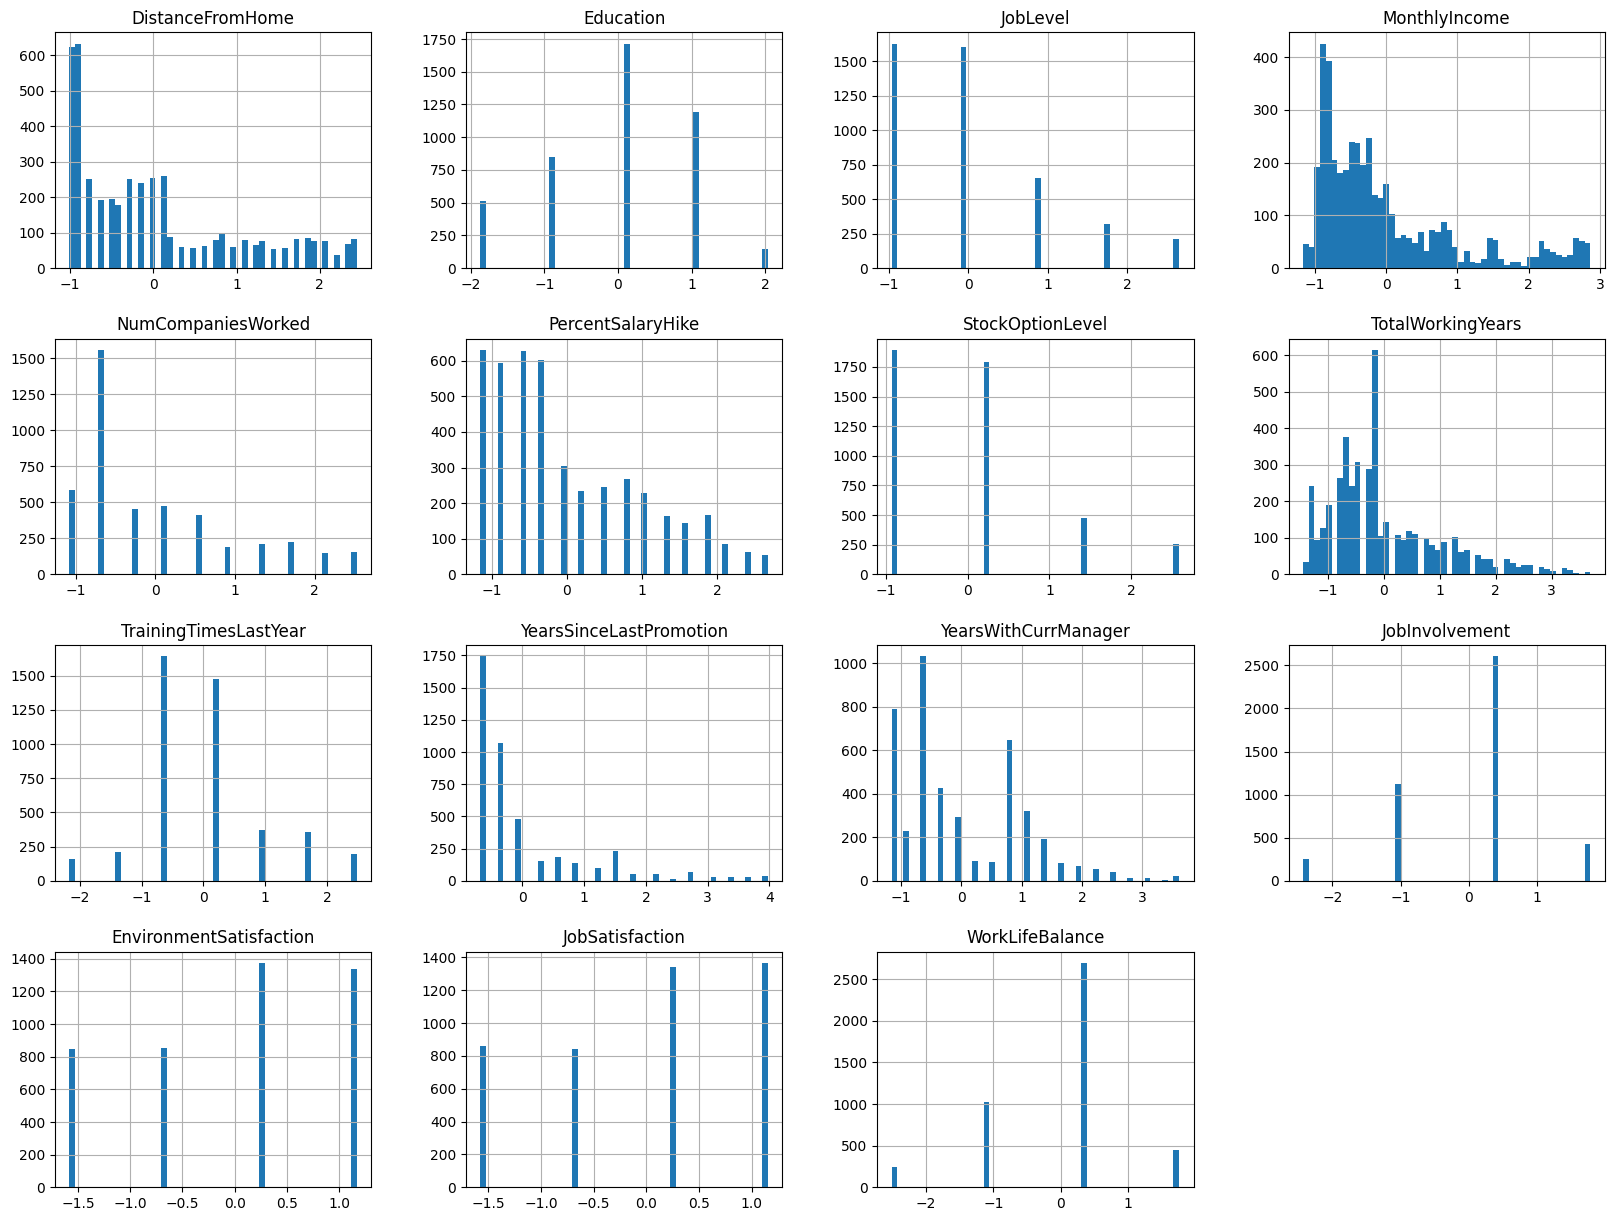

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

general_data_num_scaled.hist(bins=50, figsize=(20, 15))
plt.show()


### 3. Matrice de Corr√©lation
Pour explorer les relations entre les variables num√©riques, nous utilisons une matrice de corr√©lation et une heatmap.

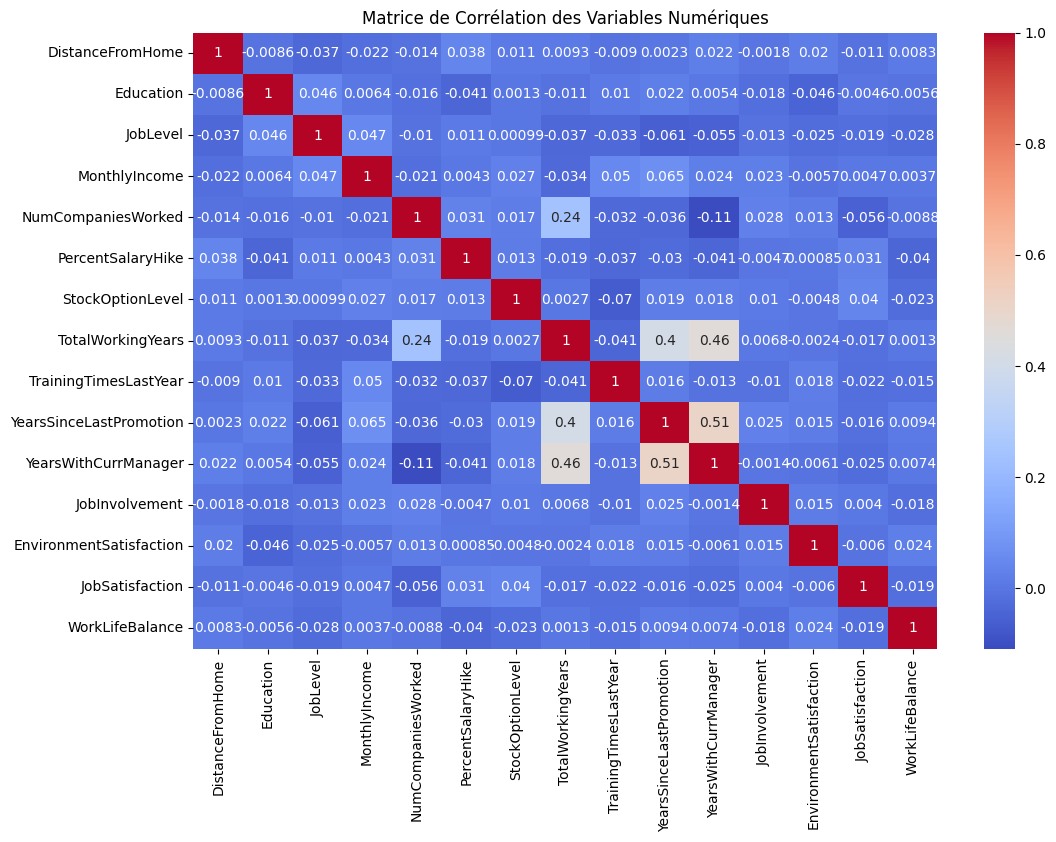

In [35]:
corr_matrix = general_data_num_scaled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(general_data_prepared[general_data_num.columns].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de Corr√©lation des Variables Num√©riques')
plt.show()


### 4. Visualisation des Relations entre les Variables
Nous allons cr√©er quelques graphes de dispersion pour visualiser les relations entre certaines variables cl√©s.

#### S√©lection des variables √† analyser  
Les variables suivantes sont choisies pour l'analyse :
- **`TotalWorkingYears`** : Nombre total d'ann√©es d'exp√©rience.  
- **`YearsAtCompany`** : Nombre d'ann√©es pass√©es dans l'entreprise actuelle.  
- **`YearsSinceLastPromotion`** : Temps √©coul√© depuis la derni√®re promotion.  


#### Cr√©ation de la matrice de dispersion  
La matrice de dispersion est g√©n√©r√©e pour observer la relation entre chaque paire de variables.

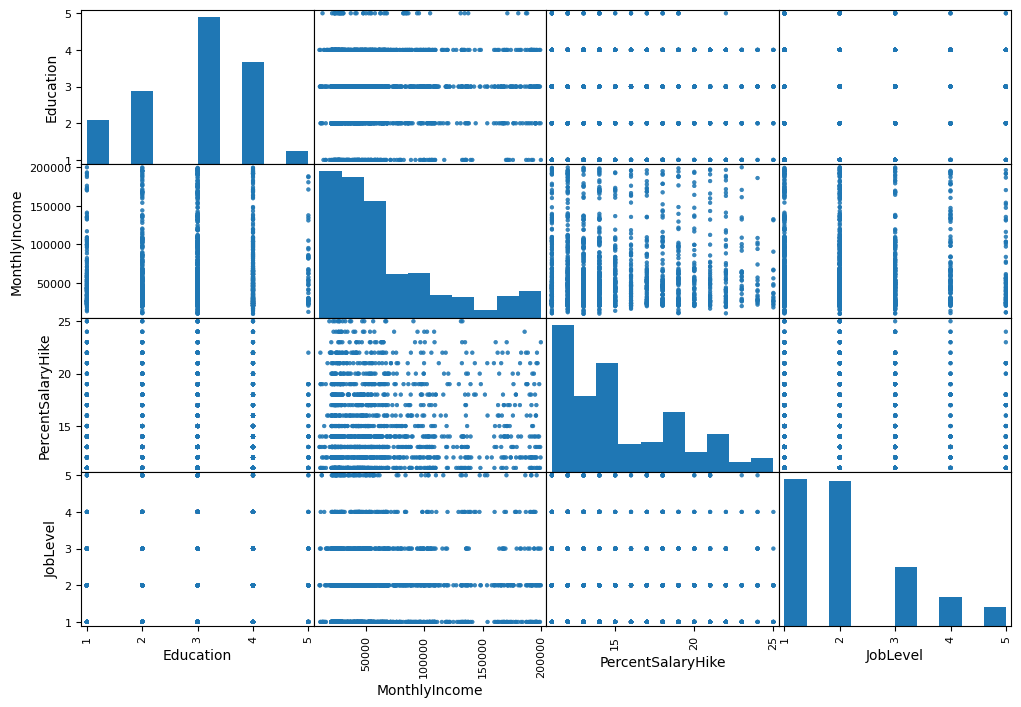

In [36]:
attributes = ["Education", "MonthlyIncome", "PercentSalaryHike","JobLevel"]
scatter_matrix = pd.plotting.scatter_matrix(general_data[attributes], figsize=(12, 8))
plt.show()


## Distribution de la variable cible

On g√©n√®re un **diagramme en barres** pour afficher la r√©partition de la variable cible `"Attrition_Yes"`.

#### 1Ô∏è. Cr√©ation du graphique de distribution  
Le graphique est g√©n√©r√© avec `sns.countplot()`, qui affiche le **nombre d'occurrences** de chaque cat√©gorie dans `"Attrition_Yes"`.


#### 2Ô∏è. Ajout d'un titre  
Le titre `"Distribution de la Variable Cible (Attrition_Yes)"` est ajout√© pour une meilleure compr√©hension du graphique.

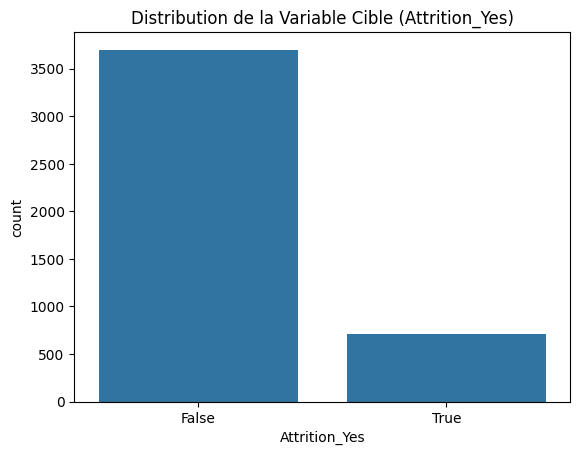

In [37]:
sns.countplot(x='Attrition_Yes', data=general_data_prepared)
plt.title('Distribution de la Variable Cible (Attrition_Yes)')
plt.show()


### 6. Relations entre les Variables et la Cible
On g√©n√®re des **boxplots** pour comparer la r√©partition des variables **`TotalWorkingYears`** et **`Age`** en fonction de la variable cible **`Attrition_Yes`**.

#### 1Ô∏è. **Boxplot de l'anciennet√© en fonction de la cible**  
Le premier boxplot montre la r√©partition de `"TotalWorkingYears"` (nombre total d'ann√©es d'exp√©rience) en fonction de `"Attrition_Yes"`.  



#### 2Ô∏è. **Boxplot de l'√¢ge en fonction de la cible**  
Le second boxplot compare la distribution de **l'√¢ge des employ√©s** selon `"Attrition_Yes"`.  


- Permet d'analyser si **l'√¢ge est un facteur de d√©part** dans l'entreprise.  
- Aide √† rep√©rer des tendances li√©es √† l'exp√©rience ou √† la stabilit√© des employ√©s.

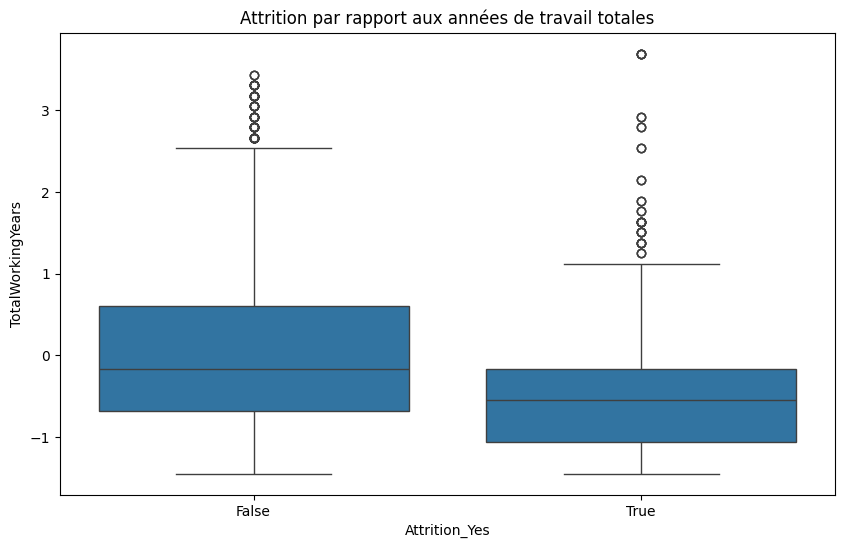

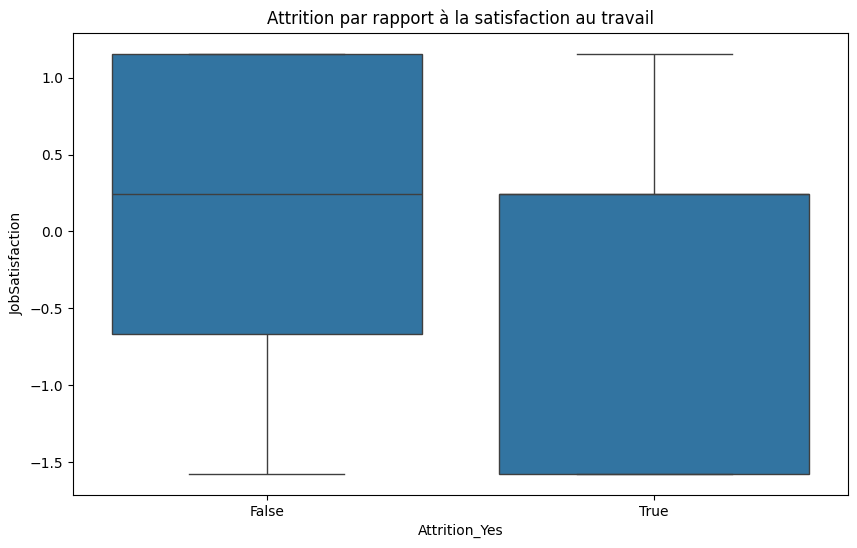

In [38]:
# Boxplot de la m√©diane des revenus par rapport √† la vente dans les 6 mois
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Yes', y='TotalWorkingYears', data=general_data_prepared)
plt.title('Attrition par rapport aux ann√©es de travail totales')
plt.show()

# Boxplot du nombre total de chambres par rapport √† la vente dans les 6 mois
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Yes', y='JobSatisfaction', data=general_data_prepared)
plt.title('Attrition par rapport √† la satisfaction au travail')
plt.show()


## Mod√®les de Classification
Dans cette section, nous allons cr√©er et √©valuer plusieurs mod√®les de classification afin de pr√©dire si un bien immobilier sera vendu dans les 6 mois (Sold6M). Nous allons explorer diff√©rents algorithmes de classification, mesurer leurs performances et comparer les r√©sultats √† l'aide de m√©triques standards.

## Application des mod√®les

## Division du dataset en ensembles d'entra√Ænement et de test

Nous utilisons `train_test_split` pour diviser les donn√©es :  
- **70%** pour l'entra√Ænement du mod√®le.  
- **30%** pour tester ses performances.  

Cela permet de mesurer la capacit√© du mod√®le √† g√©n√©raliser.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Entra√Ænement des mod√®les de classification

Nous testons plusieurs mod√®les de machine learning :  
- **R√©gression Logistique** : Simple mais efficace pour la classification binaire.  
- **SVM (Support Vector Machine)** : Capable de capturer des relations complexes entre les variables.  
- **K-Nearest Neighbors (KNN)** : Bas√© sur la proximit√© des points de donn√©es.  
- **Na√Øve Bayes** : Bas√© sur la probabilit√© conditionnelle.  

Nous comparons ensuite leurs performances.

## Nous allons appliquer la m√™me m√©thode d'entra√Ænement sur les diff√©rents mod√®le que nous allons tester.

## 1. R√©gerssion Logistique

On entra√Æne un **mod√®le de r√©gression logistique** et √©value ses performances √† l'aide de diff√©rentes m√©triques.

---

### √âtapes du traitement  

#### 1Ô∏è. **Importation des biblioth√®ques**  
Les biblioth√®ques suivantes sont utilis√©es :  
- `LogisticRegression` : Mod√®le de classification binaire.  
- `confusion_matrix`, `classification_report`, `roc_auc_score`, `roc_curve` : Outils d'√©valuation des performances.  
- `preprocessing` : Pr√©traitement des donn√©es (non utilis√© ici mais potentiellement utile).  

---

#### 2Ô∏è. **Initialisation et entra√Ænement du mod√®le**  
Le mod√®le est cr√©√© et entra√Æn√© sur les donn√©es d'entra√Ænement.

---

#### 3Ô∏è. **Pr√©diction sur l‚Äôensemble de test**  
Le mod√®le effectue des pr√©dictions sur `X_test` pour √©valuer ses performances.

---

#### 4Ô∏è. **Matrice de confusion**  
Affiche un tableau indiquant le nombre de **pr√©dictions correctes et incorrectes**.

- Permet d‚Äôanalyser **les erreurs de classification**.  
- Indique combien de **faux positifs et faux n√©gatifs** sont produits.

---

#### 5Ô∏è. **Rapport de classification**  
Affiche des m√©triques d‚Äô√©valuation du mod√®le.

**üìå Pourquoi ?**  
- `classification_report()` fournit :  
  - **Pr√©cision** : Proportion de vraies pr√©dictions positives.  
  - **Rappel** : Capacit√© √† d√©tecter toutes les classes positives.  
  - **F1-score** : Moyenne harmonique entre pr√©cision et rappel.

---

#### 6Ô∏è. **Score AUC-ROC**  
Calcule l‚Äôaire sous la courbe ROC, un indicateur global de la qualit√© du mod√®le.

- Plus l‚ÄôAUC est proche de **1**, meilleur est le mod√®le.  
- Un AUC de **0.5** signifie que le mod√®le **pr√©dit al√©atoirement**.

---

#### 7Ô∏è. **Courbe ROC**  
Trace la **courbe ROC**, qui montre le compromis entre le taux de faux positifs et le taux de vrais positifs.

- Permet d‚Äôanalyser le **seuil optimal de classification**.  
- Une courbe proche du coin sup√©rieur gauche indique un **bon mod√®le**.

Matrice de Confusion (R√©gression Logistique) :
 [[1079   36]
 [ 159   49]]
Rapport de Classification (R√©gression Logistique) :
               precision    recall  f1-score   support

       False       0.87      0.97      0.92      1115
        True       0.58      0.24      0.33       208

    accuracy                           0.85      1323
   macro avg       0.72      0.60      0.63      1323
weighted avg       0.83      0.85      0.83      1323

AUC-ROC (R√©gression Logistique) :
 0.601644963780614


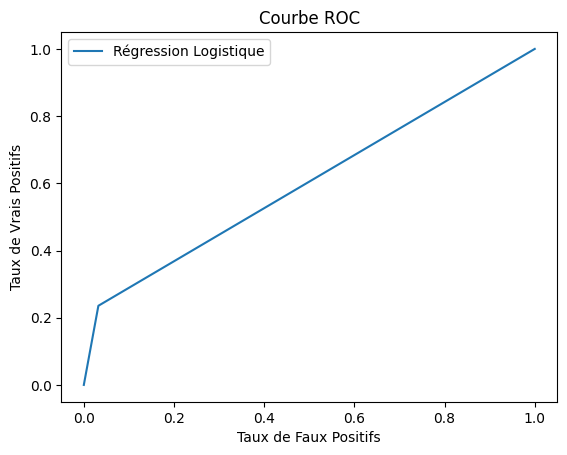

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import preprocessing
# Initialisation et entra√Ænement du mod√®le

log_reg = LogisticRegression(random_state=42).fit(X_train, y_train)

# Pr√©dictions
y_pred_log_reg = log_reg.predict(X_test)

# Matrice de confusion
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Matrice de Confusion (R√©gression Logistique) :\n", conf_matrix_log_reg)

# Rapport de classification
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Rapport de Classification (R√©gression Logistique) :\n", class_report_log_reg)

# AUC-ROC
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print("AUC-ROC (R√©gression Logistique) :\n", roc_auc_log_reg)

# Courbe ROC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label="R√©gression Logistique")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 2. Perceptron

Matrice de Confusion (Perceptron) :
 [[734 381]
 [ 95 113]]
Rapport de Classification (Perceptron) :
               precision    recall  f1-score   support

       False       0.89      0.66      0.76      1115
        True       0.23      0.54      0.32       208

    accuracy                           0.64      1323
   macro avg       0.56      0.60      0.54      1323
weighted avg       0.78      0.64      0.69      1323

AUC-ROC (Perceptron) :
 0.6007825974473957


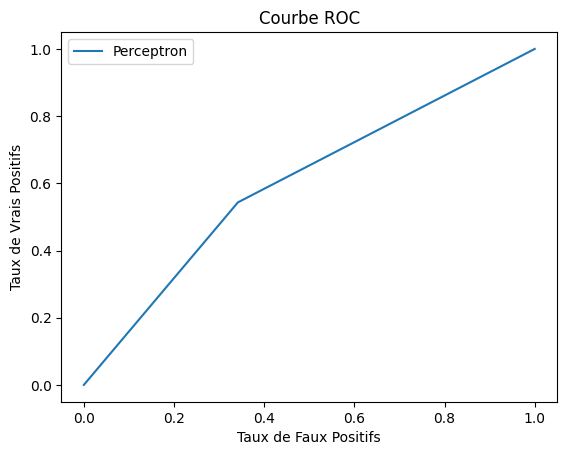

In [41]:
from sklearn.linear_model import Perceptron

# Initialisation et entra√Ænement du mod√®le

# √† Compl√©ter
# √† Compl√©ter
perceptron = Perceptron(tol=1e-3, random_state=42).fit(X_train,y_train)
# Pr√©dictions
y_pred_perceptron = perceptron.predict(X_test)

# Matrice de confusion
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
print("Matrice de Confusion (Perceptron) :\n", conf_matrix_perceptron)

# Rapport de classification
class_report_perceptron = classification_report(y_test, y_pred_perceptron)
print("Rapport de Classification (Perceptron) :\n", class_report_perceptron)

# AUC-ROC
roc_auc_perceptron = roc_auc_score(y_test, y_pred_perceptron)
print("AUC-ROC (Perceptron) :\n", roc_auc_perceptron)

# Courbe ROC
fpr_perceptron, tpr_perceptron, thresholds_perceptron = roc_curve(y_test, y_pred_perceptron)
plt.plot(fpr_perceptron, tpr_perceptron, label="Perceptron")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 3. Support Vector Machine (SVM)

Matrice de Confusion (SVM) :
 [[1106    9]
 [ 121   87]]
Rapport de Classification (SVM) :
               precision    recall  f1-score   support

       False       0.90      0.99      0.94      1115
        True       0.91      0.42      0.57       208

    accuracy                           0.90      1323
   macro avg       0.90      0.71      0.76      1323
weighted avg       0.90      0.90      0.89      1323

AUC-ROC (SVM) :
 0.7050987409451535


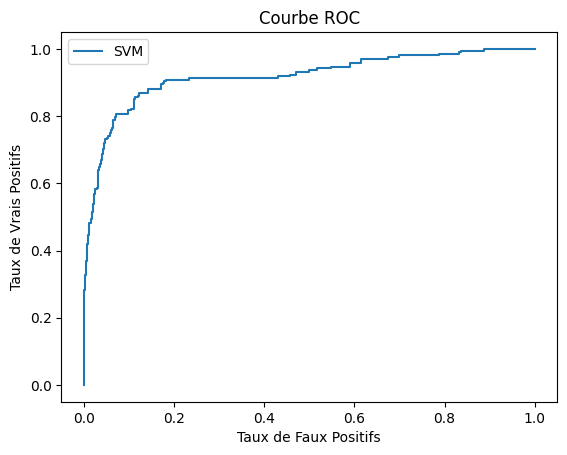

In [42]:
from sklearn.svm import SVC

# Initialisation et entra√Ænement du mod√®le
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Pr√©dictions
y_pred_svm = svm.predict(X_test)

# Matrice de confusion
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Matrice de Confusion (SVM) :\n", conf_matrix_svm)

# Rapport de classification
class_report_svm = classification_report(y_test, y_pred_svm)
print("Rapport de Classification (SVM) :\n", class_report_svm)

# AUC-ROC
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("AUC-ROC (SVM) :\n", roc_auc_svm)

# Courbe ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 4. Naive Bay√®s

Matrice de Confusion (Naive Bayes) :
 [[971 144]
 [116  92]]
Rapport de Classification (Naive Bayes) :
               precision    recall  f1-score   support

       False       0.89      0.87      0.88      1115
        True       0.39      0.44      0.41       208

    accuracy                           0.80      1323
   macro avg       0.64      0.66      0.65      1323
weighted avg       0.81      0.80      0.81      1323

AUC-ROC (Naive Bayes) :
 0.656579855122456


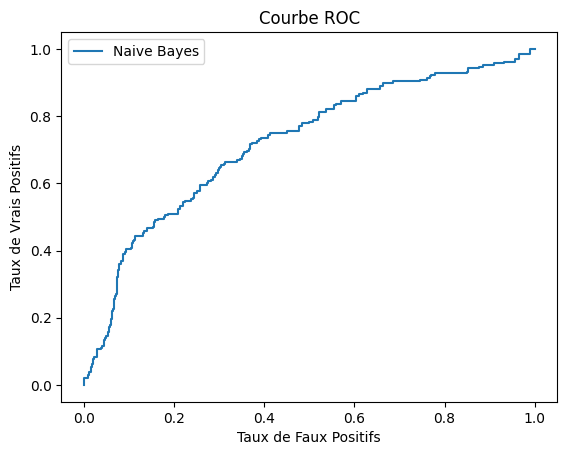

In [43]:
from sklearn.naive_bayes import GaussianNB

# Initialisation et entra√Ænement du mod√®le
nb = GaussianNB()
nb.fit(X_train, y_train)

# Pr√©dictions
y_pred_nb = nb.predict(X_test)

# Matrice de confusion
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Matrice de Confusion (Naive Bayes) :\n", conf_matrix_nb)

# Rapport de classification
class_report_nb = classification_report(y_test, y_pred_nb)
print("Rapport de Classification (Naive Bayes) :\n", class_report_nb)

# AUC-ROC
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)
print("AUC-ROC (Naive Bayes) :\n", roc_auc_nb)

# Courbe ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 5. Decision Trees

Matrice de Confusion (Decision Tree) :
 [[1093   22]
 [  22  186]]
Rapport de Classification (Decision Tree) :
               precision    recall  f1-score   support

       False       0.98      0.98      0.98      1115
        True       0.89      0.89      0.89       208

    accuracy                           0.97      1323
   macro avg       0.94      0.94      0.94      1323
weighted avg       0.97      0.97      0.97      1323

AUC-ROC (Decision Tree) :
 0.9372499137633665


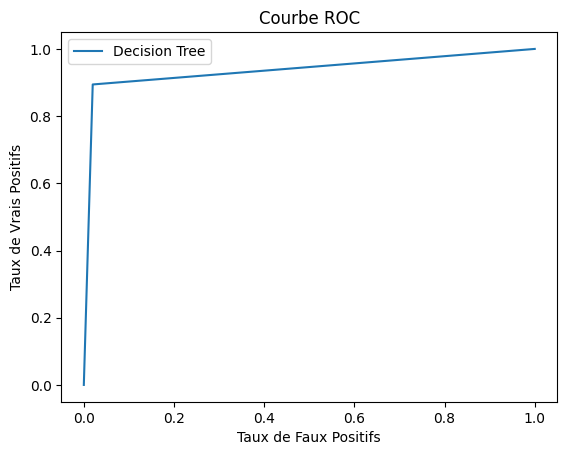

In [44]:
from sklearn.tree import DecisionTreeClassifier

# Initialisation et entra√Ænement du mod√®le
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Pr√©dictions
y_pred_tree = tree_model.predict(X_test)

# Matrice de confusion
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matrice de Confusion (Decision Tree) :\n", conf_matrix_tree)

# Rapport de classification
class_report_tree = classification_report(y_test, y_pred_tree)
print("Rapport de Classification (Decision Tree) :\n", class_report_tree)

# AUC-ROC
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
print("AUC-ROC (Decision Tree) :\n", roc_auc_tree)

# Courbe ROC
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_proba_tree)
plt.figure()
plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### 6. Random Forest

Matrice de Confusion (Random Forest) :
 [[1115    0]
 [  25  183]]
Rapport de Classification (Random Forest) :
               precision    recall  f1-score   support

       False       0.98      1.00      0.99      1115
        True       1.00      0.88      0.94       208

    accuracy                           0.98      1323
   macro avg       0.99      0.94      0.96      1323
weighted avg       0.98      0.98      0.98      1323

AUC-ROC (Random Forest) :
 0.9399038461538461


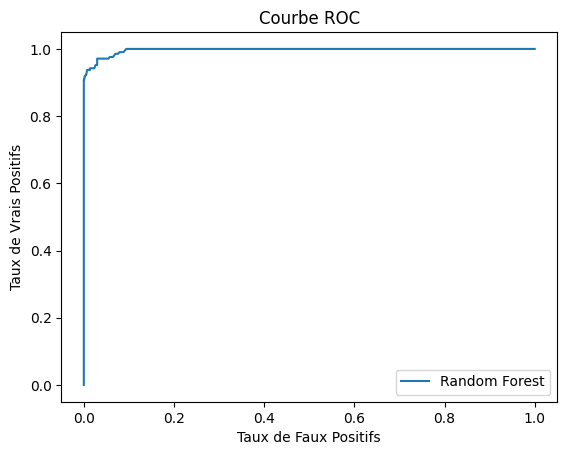

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation et entra√Ænement du mod√®le
rf_model = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=20,min_samples_leaf=1,min_samples_split=2)
rf_model.fit(X_train, y_train)

# Pr√©dictions
y_pred_rf = rf_model.predict(X_test)

# Matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matrice de Confusion (Random Forest) :\n", conf_matrix_rf)

# Rapport de classification
class_report_rf = classification_report(y_test, y_pred_rf)
print("Rapport de Classification (Random Forest) :\n", class_report_rf)

# AUC-ROC
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("AUC-ROC (Random Forest) :\n", roc_auc_rf)

# Courbe ROC
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()


### Conclusion
La random forest √©tant la meilleure option nous allons optimiser les hyperparam√®tres √† l'aide de ce code 

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# D√©finir le mod√®le
rf = RandomForestClassifier(random_state=42)

# D√©finir la grille d'hyperparam√®tres √† tester
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [10, 20, None],  # Profondeur max
    'min_samples_split': [2, 5, 10],  # Nombre min d'√©chantillons pour un split
    'min_samples_leaf': [1, 2, 4]  # Nombre min d'√©chantillons par feuille
}

# Grid Search avec validation crois√©e (cv=5 pour 5 folds)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)

# Entra√Æner GridSearchCV sur les donn√©es
grid_search.fit(X_train, y_train)

# Afficher les meilleurs param√®tres
print(grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Etude comparative entre les mod√®les SK-Learn

## 1. Pr√©paration de donn√©es d'apprentissage et de test

## Division du dataset en ensembles d'entra√Ænement et de test

Nous utilisons `train_test_split` pour diviser les donn√©es :  
- **70%** pour l'entra√Ænement du mod√®le.  
- **30%** pour tester ses performances.  

Cela permet de mesurer la capacit√© du mod√®le √† g√©n√©raliser.

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Comparaison de plusieurs mod√®les de classification
 
On entra√Æne plusieurs mod√®les de **machine learning** et effectue des pr√©dictions sur les donn√©es de test.

### √âtapes du traitement  

#### 1Ô∏è. **D√©finition des mod√®les de classification**  
Une liste de plusieurs mod√®les est cr√©√©e dans un **dictionnaire Python (`models`)** :

- **Perceptron** : Mod√®le de r√©seau de neurones simple.  
- **R√©gression Logistique** : Mod√®le statistique adapt√© aux probl√®mes de classification binaire.  
- **SVM (Support Vector Machine)** : Algorithme de classification bas√© sur les marges maximales.  
- **KNN (K-Nearest Neighbors)** : Classifie en fonction des points les plus proches.  
- **Na√Øve Bayes** : Bas√© sur les probabilit√©s conditionnelles.  
- **Arbre de d√©cision** : Mod√®le bas√© sur des r√®gles logiques successives.  
- **For√™t al√©atoire (Random Forest)** : Ensemble d'arbres de d√©cision pour am√©liorer la robustesse et √©viter le surapprentissage.


#### 2Ô∏è. **Entra√Ænement et pr√©dictions**  
Chaque mod√®le est entra√Æn√© sur `X_train` et `y_train`, puis effectue des pr√©dictions sur `X_test`.


- `.fit(X_train, y_train)` entra√Æne le mod√®le sur les donn√©es.  
- `.predict(X_test)` permet de tester le mod√®le sur des donn√©es inconnues.  
- Le dictionnaire `predictions` stocke les r√©sultats pour chaque mod√®le.

In [48]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Perceptron": Perceptron(),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42,max_depth=20,min_samples_leaf=1,min_samples_split=2)
}

# Entra√Ænement et pr√©diction
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)




## √âvaluation des mod√®les de classification
 
On √©value les performances de chaque mod√®le entra√Æn√© en g√©n√©rant des m√©triques de classification.



#### **D√©finition de la fonction `display_metrics()`**  
Cette fonction affiche les r√©sultats pour un mod√®le donn√© :

- **`classification_report(y_test, y_pred)`** :  
  Fournit plusieurs **m√©triques d'√©valuation** :
  - **Pr√©cision** : Proportion des pr√©dictions correctes parmi les positives pr√©dites.  
  - **Rappel** : Capacit√© du mod√®le √† d√©tecter les cas positifs r√©els.  
  - **F1-score** : Moyenne harmonique entre pr√©cision et rappel (√©quilibre entre les deux).  
  - **Support** : Nombre d'√©chantillons dans chaque classe.


In [49]:
from sklearn.metrics import confusion_matrix, classification_report

# Fonction pour afficher les r√©sultats
def display_metrics(y_test, y_pred, model_name):
   print(model_name)
   
   print(classification_report(y_test, y_pred))

# Calcul des m√©triques
for name, y_pred in predictions.items():
    display_metrics(y_test,y_pred,name)


Perceptron
              precision    recall  f1-score   support

       False       0.90      0.75      0.82      1115
        True       0.29      0.57      0.39       208

    accuracy                           0.72      1323
   macro avg       0.60      0.66      0.60      1323
weighted avg       0.81      0.72      0.75      1323

LogisticRegression
              precision    recall  f1-score   support

       False       0.87      0.97      0.92      1115
        True       0.58      0.24      0.33       208

    accuracy                           0.85      1323
   macro avg       0.72      0.60      0.63      1323
weighted avg       0.83      0.85      0.83      1323

SVM
              precision    recall  f1-score   support

       False       0.90      0.99      0.94      1115
        True       0.91      0.42      0.57       208

    accuracy                           0.90      1323
   macro avg       0.90      0.71      0.76      1323
weighted avg       0.90      0.90      0

##  Matrices de confusion pour chaque mod√®le

On g√©n√®re et affiche **les matrices de confusion** pour tous les mod√®les test√©s, afin d‚Äôanalyser leurs erreurs de classification.

 

#### 1Ô∏è. Boucle sur les mod√®les  
Chaque mod√®le est √©valu√© **individuellement** √† l'aide de sa matrice de confusion.

#### 2. Calcul de la matrice de confusion  
Chaque mod√®le g√©n√®re une matrice de confusion permettant d‚Äôanalyser le nombre de **pr√©dictions correctes et incorrectes**.


#### 3Ô∏è. Affichage de la matrice de confusion  
Une **repr√©sentation graphique** de la matrice de confusion est affich√©e pour chaque mod√®le.  


Perceptron


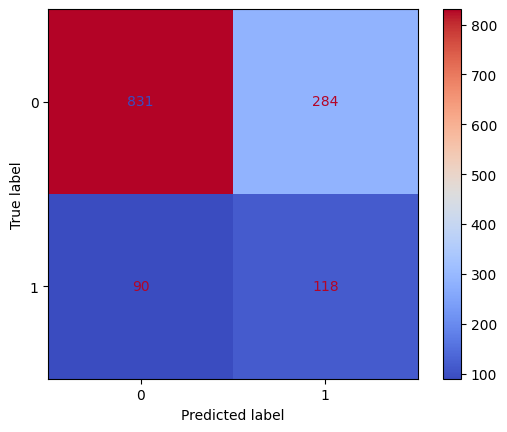

LogisticRegression


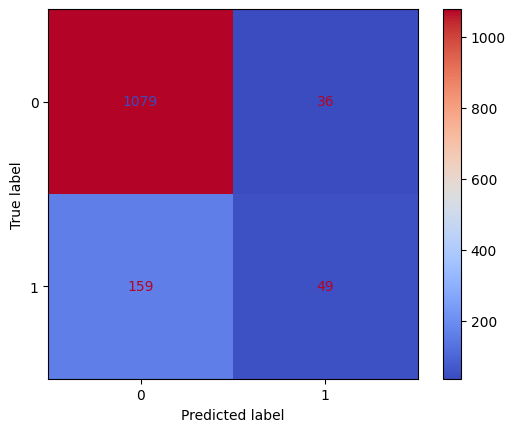

SVM


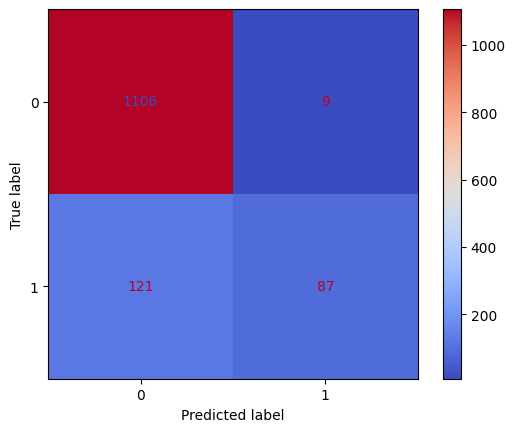

KNN


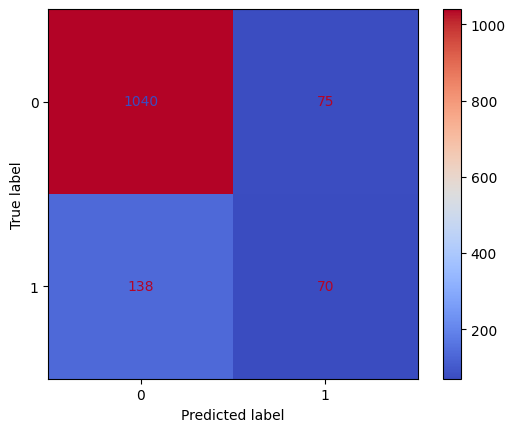

NaiveBayes


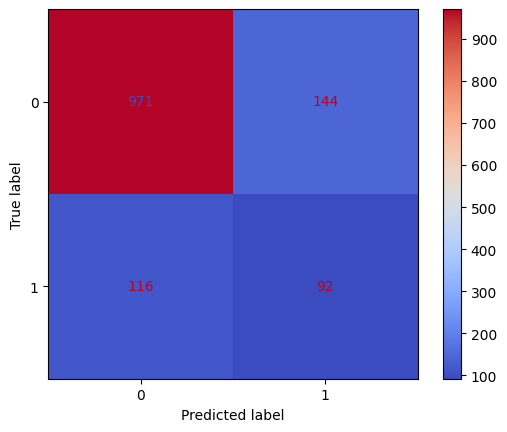

DecisionTree


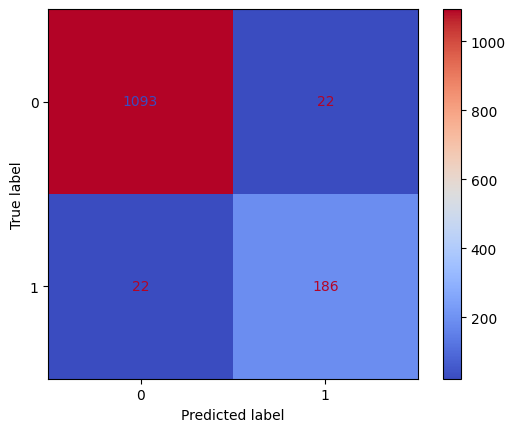

RandomForest


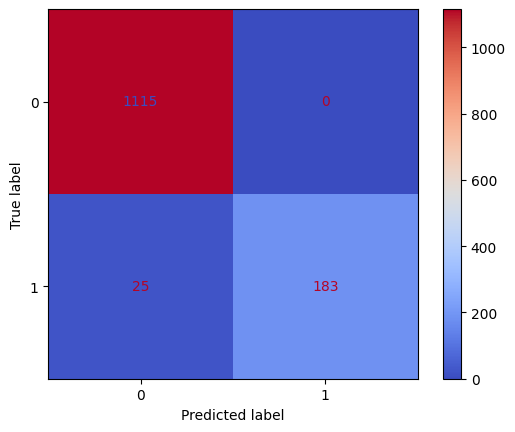

In [50]:
import seaborn as sns
import sklearn.metrics as metrics 

for name, y_pred in predictions.items():
   print(name)
   confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
   cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
   cm_display.plot(cmap="coolwarm")
   plt.show()


## Trac√© des courbes de Pr√©cision-Rappel et ROC

On g√©n√®re **les courbes de Pr√©cision-Rappel et ROC** pour chaque mod√®le afin d'√©valuer leur capacit√© de classification.

### Courbe de Pr√©cision-Rappel  

#### 1Ô∏è. Calcul des courbes de Pr√©cision-Rappel  
Chaque mod√®le est √©valu√© en calculant la **pr√©cision** et le **rappel** en fonction de diff√©rents seuils de classification.

- C'est utile lorsque les classes sont d√©s√©quilibr√©es.  
- Cela permet d‚Äôobserver **comment la pr√©cision et le rappel varient selon le seuil de d√©cision**.  

#### 2Ô∏è. Affichage de la courbe  
Chaque mod√®le est trac√© sur un m√™me graphique pour faciliter la comparaison.


### Courbe ROC  

#### 1Ô∏è. Calcul des courbes ROC et AUC  
Chaque mod√®le g√©n√®re une **courbe ROC** qui montre le taux de vrais positifs (**TPR**) en fonction du taux de faux positifs (**FPR**).

  
- Cela mesure **la performance globale du mod√®le**.  
- L‚Äô**aire sous la courbe (AUC)** est calcul√©e pour comparer les mod√®les.  
- Une AUC proche de **1** indique un bon mod√®le, alors qu‚Äôune AUC proche de **0.5** signifie une classification al√©atoire.

#### 2Ô∏è. Affichage de la courbe ROC  
- Chaque mod√®le est trac√© sur le m√™me graphique avec sa **valeur AUC** pour comparer leur efficacit√©.  
- Une diagonale (`k--`) est trac√©e pour repr√©senter **un mod√®le al√©atoire**.

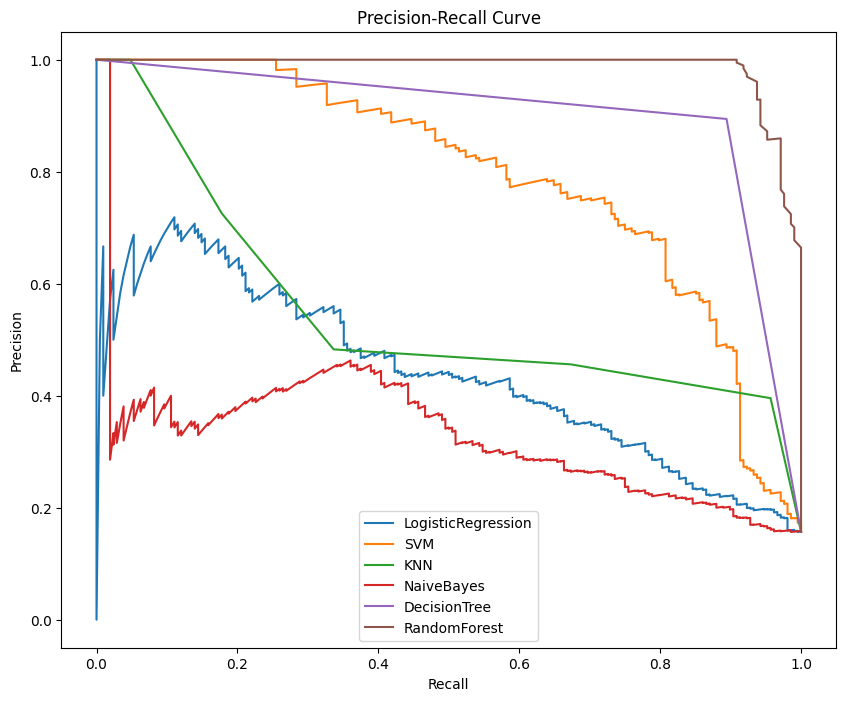

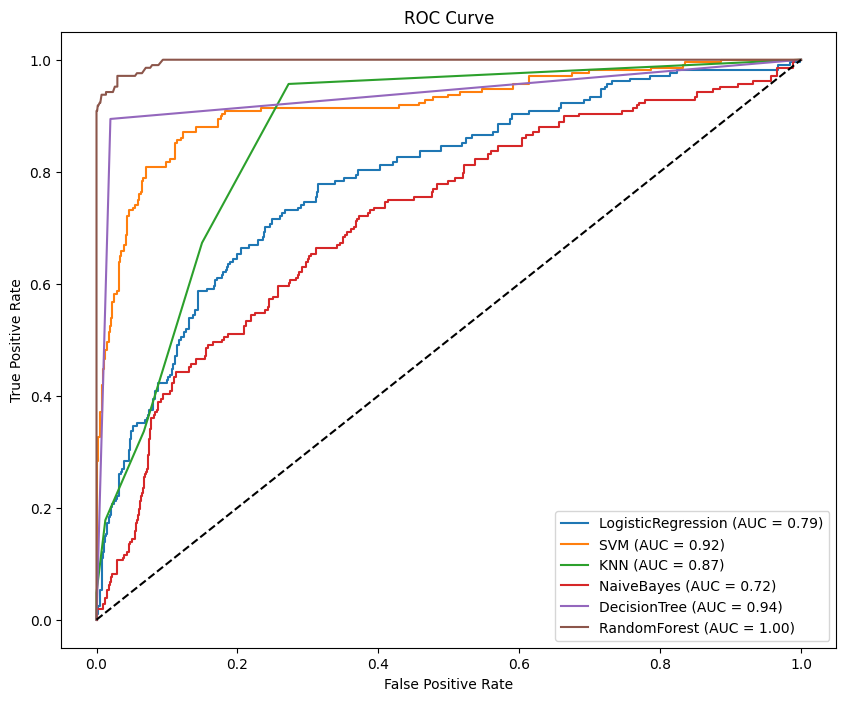

In [51]:
# Tracer les courbes de Pr√©cision-Rappel
from sklearn.metrics import precision_recall_curve


plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=f"{name}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Comparaison des scores de Pr√©cision, Rappel et F1-score

On calcule et compare les **scores de pr√©cision, rappel et F1-score** pour chaque mod√®le.


### Calcul des m√©triques de performance  

#### 1Ô∏è. Initialisation des listes de stockage  
Les listes `precision_scores`, `recall_scores` et `f1_scores` sont cr√©√©es pour stocker les scores de chaque mod√®le.

#### 2Ô∏è. Calcul des scores  
Pour chaque mod√®le :  
- **Pr√©cision (`precision_score`)** : Mesure la proportion de pr√©dictions positives correctes.  
- **Rappel (`recall_score`)** : √âvalue la capacit√© du mod√®le √† identifier correctement les cas positifs.  
- **F1-score (`f1_score`)** : Moyenne harmonique entre la pr√©cision et le rappel, refl√©tant l'√©quilibre entre les deux.


Ces m√©triques permettent d‚Äôavoir une vision globale de la qualit√© des mod√®les.  
`average='macro'` est utilis√© pour **prendre en compte l'√©quilibre des classes** lors du calcul du rappel et du F1-score.


### Cr√©ation du DataFrame et affichage des r√©sultats  

#### 1Ô∏è. Cr√©ation du tableau de scores  
Les scores sont stock√©s dans un **DataFrame pandas** pour une meilleure lisibilit√©.

#### 2Ô∏è. Affichage sous forme de bo√Æte √† moustaches  
Le graphique permet de **visualiser la distribution des scores** pour chaque mod√®le.

**Pourquoi ?**  
- Permet une **comparaison rapide** entre tous les mod√®les.  
- Aide √† d√©tecter les mod√®les **avec des performances plus homog√®nes ou variables**.

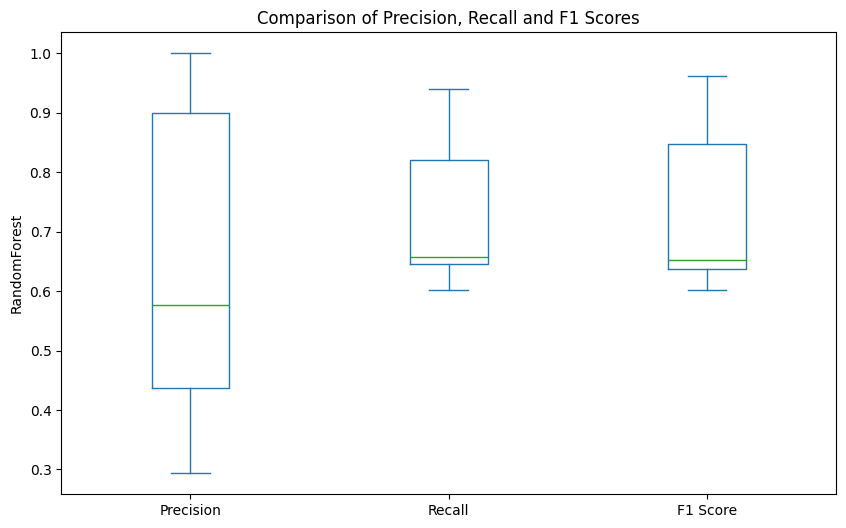

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_scores = []
recall_scores = []
f1_scores = []

for name, y_pred in predictions.items():
    
    precision_scores.append(precision_score(y_test,y_pred))
    recall_scores.append(recall_score(y_test,y_pred,average='macro'))
    f1_scores.append(f1_score(y_test,y_pred,average='macro'))
    
score_df = pd.DataFrame({
    'Model': models.keys(),
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

score_df.plot(ylabel=name,kind='box', figsize=(10, 6))
plt.title("Comparison of Precision, Recall and F1 Scores")
plt.show()


## √âvaluation des mod√®les avec l'AUC-ROC
 
On code calcule plusieurs m√©triques de classification, y compris **l‚ÄôAUC-ROC**, pour comparer les performances des mod√®les.

### Calcul des m√©triques  

#### 1Ô∏è. Initialisation de la liste `scores`  
Une liste est cr√©√©e pour stocker les r√©sultats de chaque mod√®le.

#### 2Ô∏è. Calcul des scores pour chaque mod√®le  
Pour chaque mod√®le, les m√©triques suivantes sont calcul√©es :
- **Pr√©cision (`precision_score`)** : Taux de pr√©dictions positives correctes.  
- **Rappel (`recall_score`)** : Capacit√© du mod√®le √† d√©tecter les cas positifs.  
- **F1-score (`f1_score`)** : Moyenne harmonique entre pr√©cision et rappel.  
- **AUC-ROC (`roc_auc_score`)** : Mesure la capacit√© du mod√®le √† distinguer les classes.
  
L‚ÄôAUC-ROC permet d‚Äô√©valuer **la qualit√© des pr√©dictions probabilistes**.  
`predict_proba()` est utilis√© pour obtenir les probabilit√©s lorsque disponible.  
Un mod√®le avec une **AUC proche de 1** est performant, tandis qu‚Äôune **AUC proche de 0.5** signifie une classification al√©atoire.

#### 1Ô∏è. Stockage des m√©triques dans un DataFrame  
Les r√©sultats sont enregistr√©s dans `scores_df` pour une analyse facile.

#### 2Ô∏è. Affichage des r√©sultats  
Le tableau final affiche les scores de chaque mod√®le.

In [53]:
from sklearn.metrics import roc_auc_score

scores = []

for name, y_pred in predictions.items():
    y_proba = models[name].predict_proba(X_test)[:, 1] if hasattr(models[name], "predict_proba") else None
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    scores.append({
        'Model': name,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': auc_score
    })

scores_df = pd.DataFrame(scores)
print(scores_df)


                Model  Precision    Recall  F1 Score       AUC
0          Perceptron   0.293532  0.567308  0.386885       NaN
1  LogisticRegression   0.576471  0.235577  0.334471  0.786797
2                 SVM   0.906250  0.418269  0.572368  0.918036
3                 KNN   0.482759  0.336538  0.396601  0.868888
4          NaiveBayes   0.389831  0.442308  0.414414  0.719541
5        DecisionTree   0.894231  0.894231  0.894231  0.937250
6        RandomForest   1.000000  0.879808  0.936061  0.996844


## Importance des caract√©ristiques avec Random Forest

On analyse **l'importance des caract√©ristiques** dans un mod√®le **Random Forest**, en identifiant les variables les plus influentes.

### √âtapes du traitement  

#### 1Ô∏è. D√©finition des noms des caract√©ristiques  
Les noms des variables sont r√©cup√©r√©s et format√©s pour √™tre affich√©s plus tard dans le graphique.

#### 2Ô∏è. Calcul des importances des caract√©ristiques  
Le mod√®le `RandomForestClassifier` calcule l'importance de chaque variable √† l‚Äôaide de la **Mean Decrease in Impurity (MDI)**.

#### 3Ô∏è. Mesure du temps d‚Äôex√©cution  
Le temps n√©cessaire au calcul des importances est mesur√© et affich√© pour v√©rifier la **rapidit√© du mod√®le** et d√©tecter d‚Äô√©ventuelles lenteurs. 

#### 4Ô∏è. Cr√©ation d‚Äôun graphique des importances  
Un graphique en **barres** est g√©n√©r√© pour visualiser l'importance de chaque caract√©ristique.
Cela Permet d'**interpr√©ter** le mod√®le et de voir quelles variables influencent le plus la d√©cision.

Elapsed time to compute the importances: 0.026 seconds


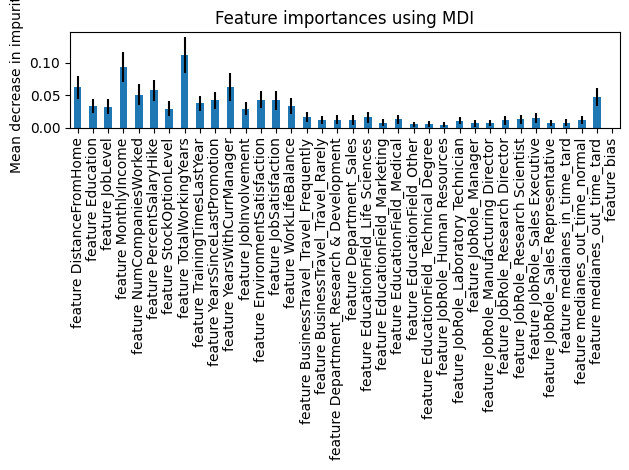

In [54]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {X_train.columns[i]}" for i in range(X.shape[1])]
#forest = RandomForestClassifier(random_state=0)
#forest.fit(X_train, y_train)
import time

import numpy as np

start_time = time.time()
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Mesure des temps d'entra√Ænement et de pr√©diction

Ce code mesure et compare le **temps d'entra√Ænement** et le **temps de pr√©diction** des diff√©rents mod√®les de classification.


### √âtapes du traitement  

#### 1Ô∏è. Initialisation des listes  
Deux listes sont cr√©√©es pour stocker :  
- `training_times` : Temps pris par chaque mod√®le pour √™tre entra√Æn√© sur `X_train`.  
- `prediction_times` : Temps pris pour effectuer des pr√©dictions sur `X_test`.


#### 2Ô∏è. Boucle sur les mod√®les  
Chaque mod√®le est √©valu√© individuellement :  

1. **Mesure du temps d'entra√Ænement**   
2. **Mesure du temps de pr√©diction**    

Cela nous permet d‚Äô√©valuer **l‚Äôefficacit√© des mod√®les en termes de rapidit√©**.

#### 3Ô∏è. Stockage des r√©sultats dans un DataFrame  
Les temps sont enregistr√©s dans un **tableau pandas** (`time_df`) pour une meilleure lisibilit√©.


#### 4Ô∏è. Affichage des r√©sultats  
Le tableau est affich√© avec les temps d'entra√Ænement et de pr√©diction pour chaque mod√®le.

In [55]:
import time

training_times = []
prediction_times = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_times.append(time.time()-start_time)

    start_time = time.time()
    model.predict(X_test)
    prediction_times.append(time.time()-start_time)
    
time_df = pd.DataFrame({
    'Model': models.keys(),
    'Training Time (s)': training_times,
    'Prediction Time (s)': prediction_times
})
print(time_df)


                Model  Training Time (s)  Prediction Time (s)
0          Perceptron           0.004000             0.001003
1  LogisticRegression           0.017994             0.002002
2                 SVM           0.947702             0.120530
3                 KNN           0.003999             0.067521
4          NaiveBayes           0.003000             0.001997
5        DecisionTree           0.021000             0.002003
6        RandomForest           0.634127             0.031528


## Interpr√©tation des R√©sultats
### 1. Analyse des Performances
Les performances des diff√©rents mod√®les sont compar√©es √† l'aide des m√©triques de classification et des courbes ROC. La DecisionTree et la RandomForest montrent des performances robustes, tandis que les KNN et Naive Bayes montrent des variations plus importantes en fonction des donn√©es.

### 2. Discussion des R√©sultats
Le mod√®le de r√©gression logistique a montr√© une mauvaise capacit√© de g√©n√©ralisation, avec un mauvais √©quilibre entre pr√©cision et rappel.
Le mod√®le SVM a en revanche bien perform√©, avec une AUC √©lev√©e, indiquant une bonne capacit√© de discrimination entre les classes.
Les performances du Perceptron sont inf√©rieures, mais il reste un bon choix pour une impl√©mentation rapide et simple.
Le KNN et le Naive Bayes peuvent √™tre am√©lior√©s par des ajustements de leurs hyperparam√®tres respectifs.

Concernant les param√®tres qui ont le plus d'importance on retrouve le salaire, le nombre d'ann√©e travaill√©, la distance depuis son habitation et le fait de quitter tard.

## Conclusion
### 1. Synth√®se des Travaux R√©alis√©s
Nous avons d√©velopp√© et valid√© plusieurs mod√®les de classification pour pr√©dire si un employ√© quittera l'entreprise. Les r√©sultats montrent que la randomForest et les SVM sont les mod√®les les plus performants. Avec l'optimisation des hyperparm√®tres la RandomForest sera n√©anmoins choisi comme model final

### 2. Perspectives d'Am√©lioration
Afin d'am√©liorer le turn-over de l'entreprise, il faudrait une augmentation des salaires, √©viter d'embaucher des personnes qui habitent trop loin de l'entreprise et voir avec les employ√©es qui quittent tard si on peux am√©liorer leurs condition de travail.